#### VENKATA RAMANA REDDY DUGGEMPUDI, 50539685

# <center>CSE 4/546: Reinforcement Learning</center>
## <center>Prof. Alina Vereshchaka</center>
### <center>Assignment 1, Part 1 and part 2</center>

## Part 1 Defining RL Environments

### 1.1 Deterministic Enviroment

In [51]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt

In [52]:
class DeterministicEnvironment(gym.Env):
    metadata = {'render.modes': []}
    
    
    def __init__(self, timesteps=10):
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = timesteps

        self.timestep = 0
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        self.reward_pos_1 = [1,1]
        self.reward_pos_2 = [2,1]
        self.reward_pos_3 = [2,2]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

    def reset(self, **kwargs):
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = [i for i in self.agent_pos]

        info = {}

        return observation, info

    def step(self, action):
        if action == 0: # for down
            self.agent_pos[0] += 1
        if action == 1: # for up
            self.agent_pos[0] -= 1
        if action == 2: # to the right
            self.agent_pos[1] += 1
        if action == 3: # to the left
            self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 2) # it locks the agent position
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = [i for i in self.agent_pos]

        reward = 0  # Initialize reward
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward += 5
        if np.array_equal(self.agent_pos, self.reward_pos_1):
            reward += 1
        if np.array_equal(self.agent_pos, self.reward_pos_2):
            reward += 2
        if np.array_equal(self.agent_pos, self.reward_pos_3):
            reward += 3

        self.timestep += 1
        terminated = True if self.timestep >= self.max_timesteps else False
        truncated = True if np.all((self.agent_pos >= 0) & (self.agent_pos <= 2)) else False
        info = {}
        return observation, reward, terminated, truncated, info
            
            
        
    def render(self):
        plt.title('DeterministicEnvironment')
        plt.imshow(self.state)
        plt.show()

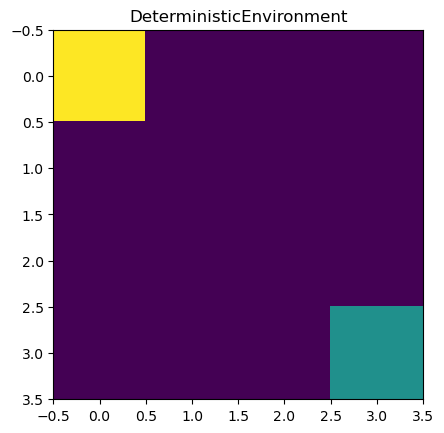

In [53]:
env = DeterministicEnvironment()

terminated, truncated = False, False
obs, info = env.reset()
env.render()

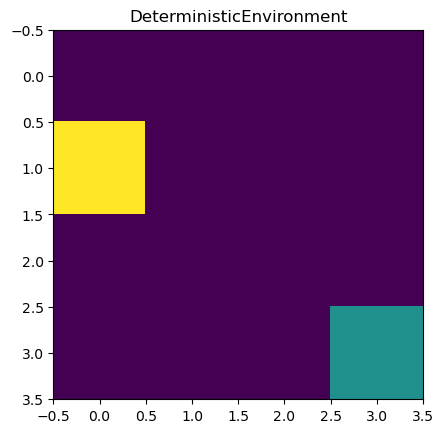

In [54]:
action = 0
observation, reward, terminated, truncated, info = env.step(action)
env.render()

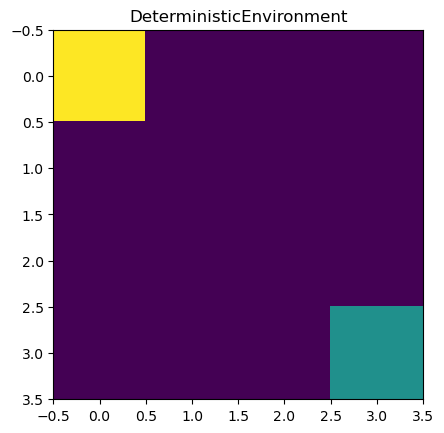

In [55]:
action = 1
observation, reward, terminated, truncated, info = env.step(action)
env.render()

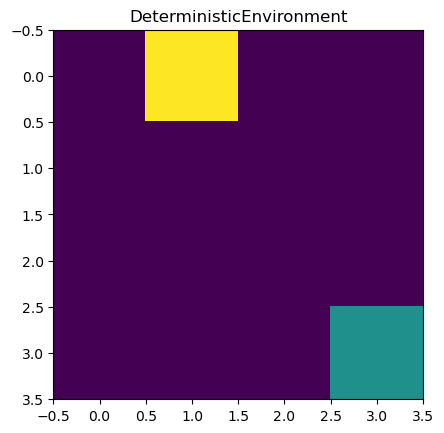

In [56]:
action = 2
observation, reward, terminated, truncated, info = env.step(action)
env.render()

In [57]:
class RandomAgent:
    
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
        
    def step(self, obs):
        return np.random.choice(self.action_space.n)

Agent_pos:  [0, 0] action:  1  Reward:  0


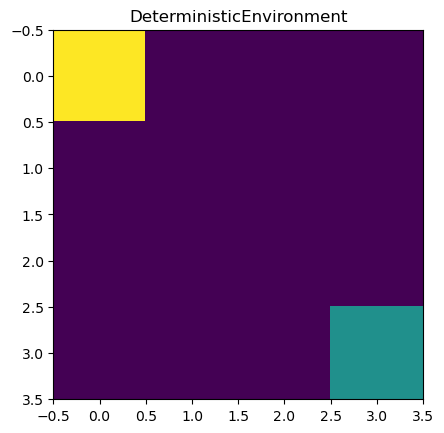

Agent_pos:  [1, 0] action:  0  Reward:  0


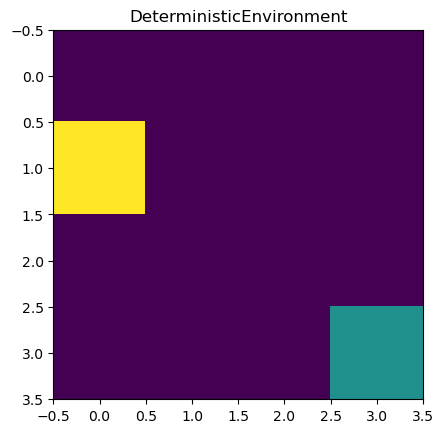

Agent_pos:  [1, 0] action:  3  Reward:  0


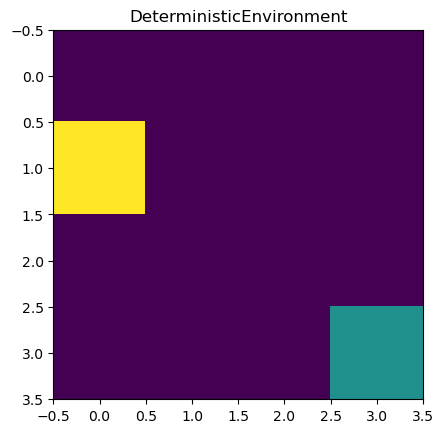

Agent_pos:  [0, 0] action:  1  Reward:  0


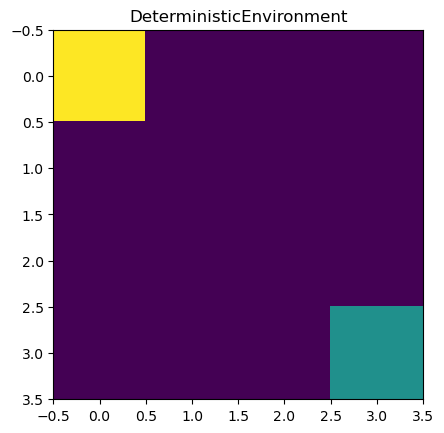

Agent_pos:  [1, 0] action:  0  Reward:  0


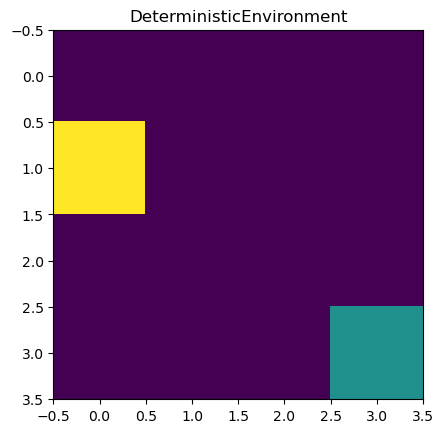

Agent_pos:  [1, 1] action:  2  Reward:  1


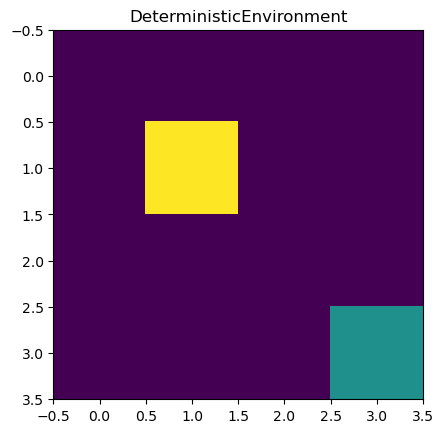

Agent_pos:  [0, 1] action:  1  Reward:  0


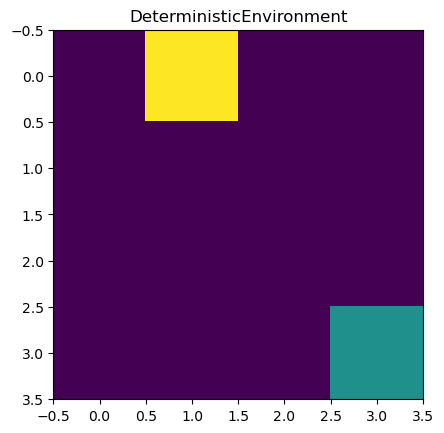

Agent_pos:  [0, 0] action:  3  Reward:  0


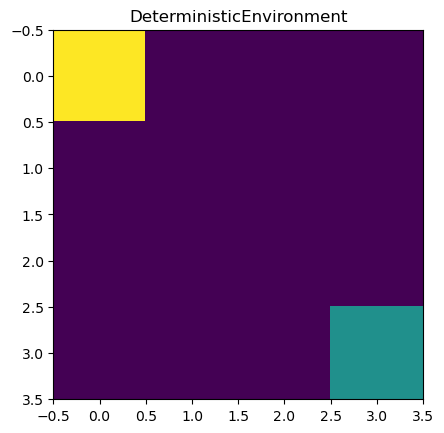

Agent_pos:  [0, 0] action:  3  Reward:  0


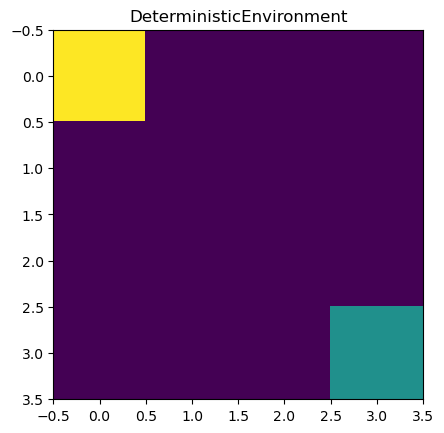

Agent_pos:  [0, 0] action:  1  Reward:  0


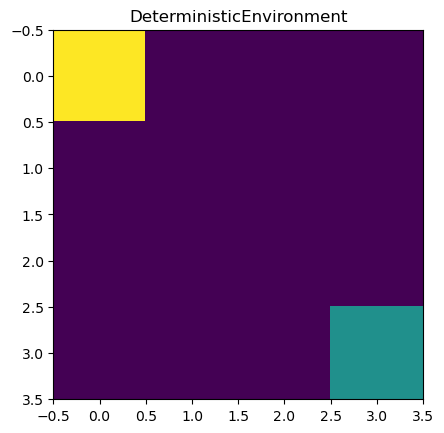

In [58]:
if __name__ == '__main__':
    env = DeterministicEnvironment()
    agent = RandomAgent(env)
    
    obs, info = env.reset()
    terminated, truncated = False, False
    
    while not terminated:
        action = agent.step(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        print("Agent_pos: ", obs, 'action: ', action, ' Reward: ', reward)
        env.render()

## 1.2 Defining Stochastic Environment

In [59]:
class StochasticEnvironment(gym.Env):
    
    metadata = {'render.modes': []}
    
    
    def __init__(self, timesteps=10):
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = timesteps

        self.timestep = 0
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        self.reward_pos_1 = [1,1]
        self.reward_pos_2 = [2,1]
        self.reward_pos_3 = [2,2]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

    def reset(self, **kwargs):
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = [i for i in self.agent_pos]

        info = {}

        return observation, info

    def step(self, action):

        if np.random.uniform() < 0.2:
            action = np.random.randint(0, 4)

        if action == 0: # for down
            self.agent_pos[0] += 1


        if action == 1: # for up
            self.agent_pos[0] -= 1


        if action == 2: # to the right
            self.agent_pos[1] += 1

        if action == 3: # to the left
            self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 2) # it locks the agent position
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = [i for i in self.agent_pos]


        reward = sum(self.agent_pos)*np.random.rand()
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward += 5

        if np.array_equal(self.agent_pos, self.reward_pos_1):
            reward += 1

        if np.array_equal(self.agent_pos, self.reward_pos_2):
            reward += 2

        if np.array_equal(self.agent_pos, self.reward_pos_3):
            reward += 3

        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False
        
        truncated = True if np.all((self.agent_pos >= 0) & (self.agent_pos <= 2)) else False
        
        
        
        info = {}

        return observation, reward, terminated, truncated, info
            
    

        
    def render(self):
        plt.title('StochasticEnvironment')
        plt.imshow(self.state)
        plt.show()

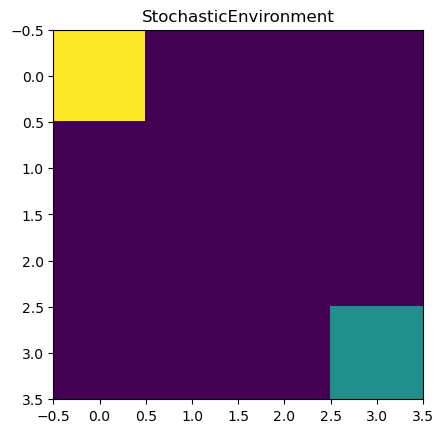

In [60]:
env = StochasticEnvironment()

terminated, truncated = False, False
obs, info = env.reset()
env.render()

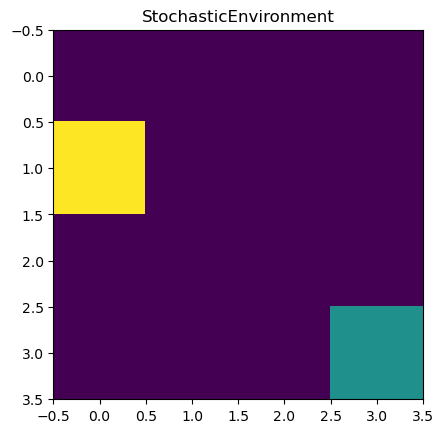

In [61]:
action = 0
observation, reward, terminated, truncated, info = env.step(action)
env.render()

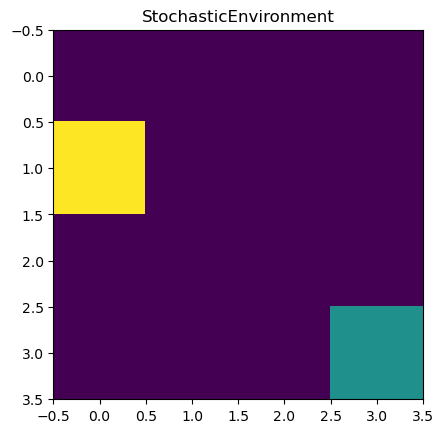

In [62]:
action = 4
observation, reward, terminated, truncated, info = env.step(action)
env.render()

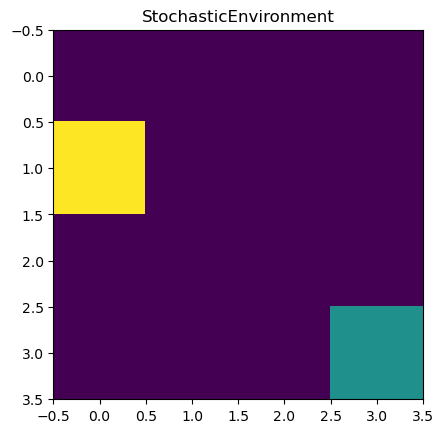

In [63]:
action = 2
observation, reward, terminated, truncated, info = env.step(action)
env.render()

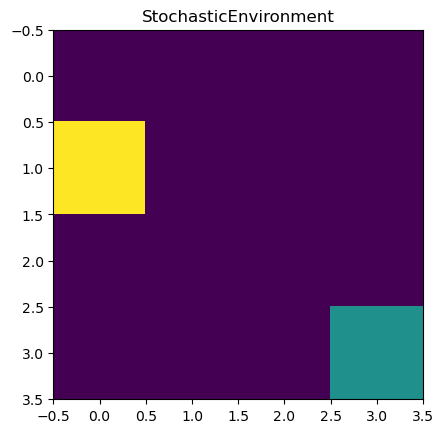

In [64]:
action = 3
observation, reward, terminated, truncated, info = env.step(action)
env.render()

Agent_pos:  [1, 0] Action:  3  Reward:  0.4993315968755285 , Done:  False


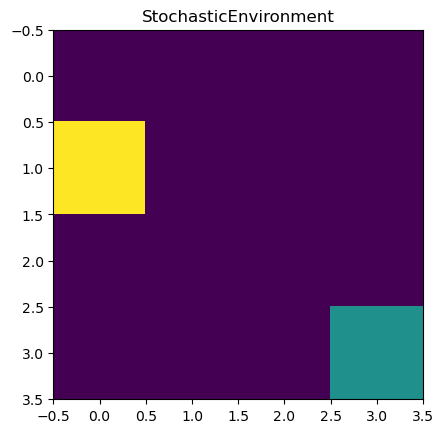

Agent_pos:  [1, 1] Action:  2  Reward:  1.0342980909489816 , Done:  False


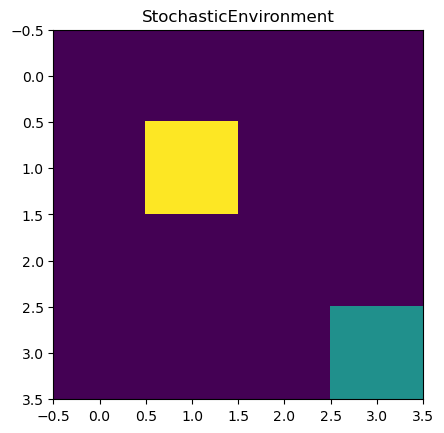

Agent_pos:  [1, 0] Action:  3  Reward:  0.3198319943783007 , Done:  False


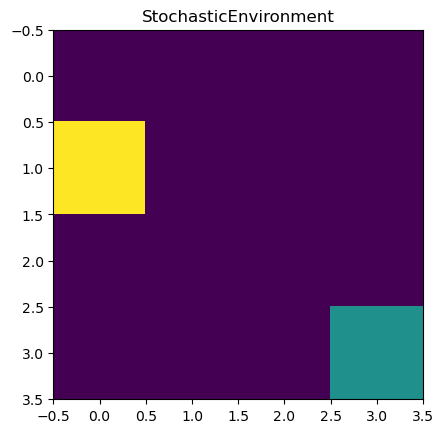

Agent_pos:  [0, 0] Action:  1  Reward:  0.0 , Done:  False


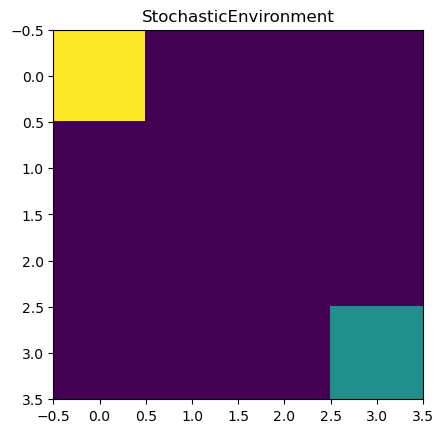

Agent_pos:  [0, 0] Action:  1  Reward:  0.0 , Done:  False


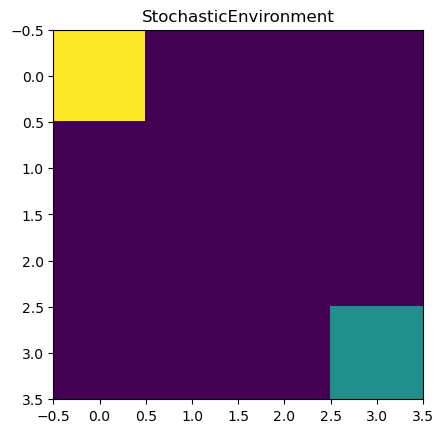

Agent_pos:  [0, 1] Action:  0  Reward:  0.7807654199668475 , Done:  False


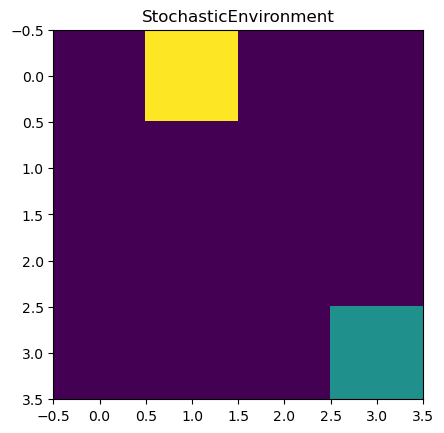

Agent_pos:  [1, 1] Action:  0  Reward:  1.745435497258326 , Done:  False


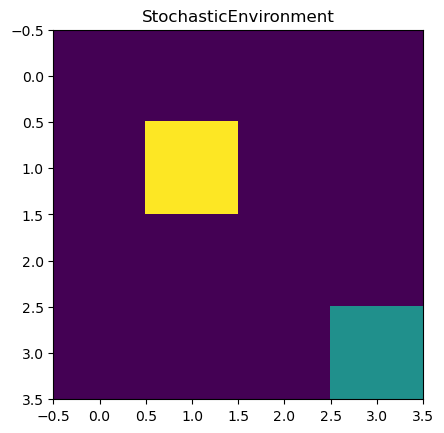

Agent_pos:  [0, 1] Action:  1  Reward:  0.28766229864098336 , Done:  False


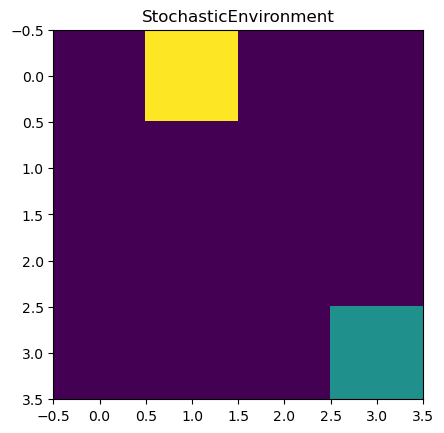

Agent_pos:  [0, 1] Action:  1  Reward:  0.485918816308628 , Done:  False


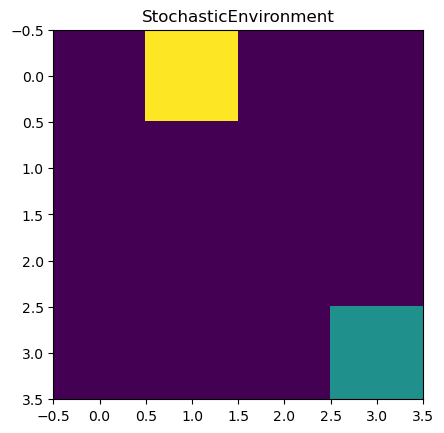

Agent_pos:  [0, 0] Action:  2  Reward:  0.0 , Done:  True


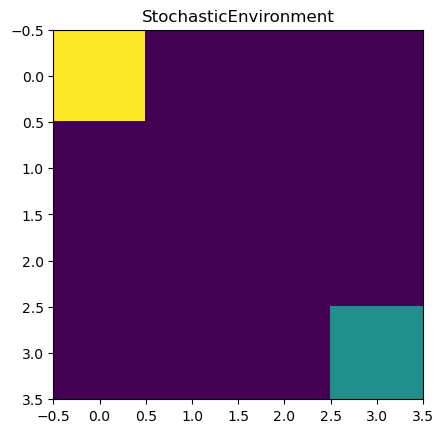

In [65]:
if __name__ == '__main__':
    env = StochasticEnvironment()
    agent = RandomAgent(env)
    
    obs, info = env.reset()
    terminated, truncated = False, False
    
    
    while not terminated:
        action = agent.step(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        print("Agent_pos: ", obs, "Action: ", action, ' Reward: ', reward, ', Done: ', terminated)
        env.render()

## 2.1 Q-learning

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

class EpsilonGreedyQlearning:
    def __init__(self, env, epsilon, episodes, n_actions, max_timesteps, learning_rate, discount_factor):
        
        self.epsilon = epsilon
        self.q_table = {}
        self.env = env
        self.episodes = episodes
        self.max_timesteps = max_timesteps
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        
        for i in range(4):
            for j in range(4):
                self.q_table[tuple([i, j])] = np.random.rand(n_actions)
        
        self.q_table[(3, 3)] = np.zeros(4)        
        
    def select_action(self, state):
        if np.random.rand() > self.epsilon:
            return np.argmax(self.q_table[tuple(state)])
        else:
            return np.random.choice(4)
        
    def update_q_table(self, state, action, reward, next_state, learning_rate, discount_factor):
        max_next_q = np.max(self.q_table[tuple(state)])  
        td_target = reward + self.discount_factor * max_next_q
        self.q_table[tuple(state)][action] += self.learning_rate * (td_target - self.q_table[tuple(state)][action])
        
    def epsilon_decay(self):
        epsilon_per_episode = []
        total_rewards_per_episode = []
        epsilon_threshold = 0.15
        for i in range(self.episodes):
            epsilon_per_episode.append(self.epsilon)
            state, info = self.env.reset()
            total_reward = 0
            terminated = False
            while not terminated:
                action = self.select_action(state)
                # next_state, reward, terminated, truncated, info = self.env.step(action)
                next_state, reward, terminated, truncated, info = self.env.step(action)
                total_reward += reward

                self.update_q_table(state, action, reward, next_state, self.learning_rate, self.discount_factor)
                state = next_state
            self.epsilon = max(0.95 * self.epsilon, epsilon_threshold)
            total_rewards_per_episode.append(total_reward)
        
        fig, axs = plt.subplots(2, 1)
        axs[0].plot(total_rewards_per_episode)
        axs[0].set_title('Total rewards per episode')
        axs[0].set_xlabel('Episode')
        axs[0].set_ylabel('Total rewards')
        axs[0].grid(True)
        
        
        axs[1].plot(epsilon_per_episode)
        axs[1].set_title('Epsilon Decay')
        axs[1].set_xlabel('Episode')
        axs[1].set_ylabel('Epsilon Value')
        axs[1].grid(True)

        plt.tight_layout()
        plt.show()

    def run_greedy_policy(self, episodes=100):
        total_rewards_per_episode = []
        for episode in range(episodes):
            state, info = self.env.reset()
            total_reward = 0
            terminated = False

            while not terminated:
                action = np.argmax(self.q_table[tuple(state)])  # Always choosing the best action
                next_state, reward, terminated, truncated, info = self.env.step(action)
                total_reward += reward
                state = next_state
            total_rewards_per_episode.append(total_reward)

        plt.figure()
        plt.plot(total_rewards_per_episode)
        plt.title('Total Rewards per Episode with Greedy Policy')
        plt.xlabel('Episode')
        plt.ylabel('Total Rewards')
        plt.show()
        
    def save(self, filename):
        with open(filename, 'wb') as f:
          pickle.dump(self.q_table, f)


    def load(self, filename):
        with open(filename, 'rb') as f:
          self.q_table = pickle.load(f)


### Qlearning with Deterministic Environement

In [67]:
from pprint import pprint

Initial Q Table
{(0, 0): array([0.67308251, 0.41965396, 0.93348872, 0.02581915]),
 (0, 1): array([0.28384431, 0.77194042, 0.06529251, 0.1743196 ]),
 (0, 2): array([0.02102226, 0.8701947 , 0.92689449, 0.53785551]),
 (0, 3): array([0.40231182, 0.67399356, 0.8368241 , 0.05456685]),
 (1, 0): array([0.26241445, 0.84590431, 0.28316006, 0.81236444]),
 (1, 1): array([0.74169722, 0.67032244, 0.12364682, 0.48309196]),
 (1, 2): array([0.26754272, 0.03660497, 0.10118062, 0.1956726 ]),
 (1, 3): array([0.36095374, 0.47118144, 0.41762104, 0.71073412]),
 (2, 0): array([0.67474853, 0.25110578, 0.56122994, 0.60407962]),
 (2, 1): array([0.7600088 , 0.54038587, 0.66673108, 0.70527211]),
 (2, 2): array([0.50616184, 0.14850652, 0.59072383, 0.78627003]),
 (2, 3): array([0.20310204, 0.20856761, 0.51416665, 0.23040011]),
 (3, 0): array([0.01964016, 0.74697683, 0.20019945, 0.93484611]),
 (3, 1): array([0.1490391 , 0.33120117, 0.50743012, 0.04085697]),
 (3, 2): array([0.1044677 , 0.91100633, 0.84642643, 0.083980

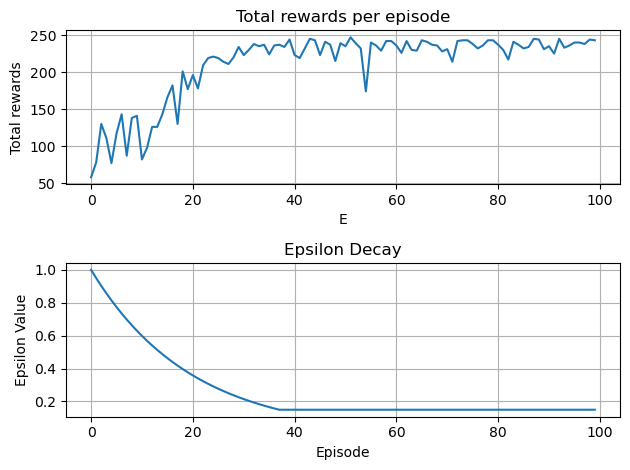

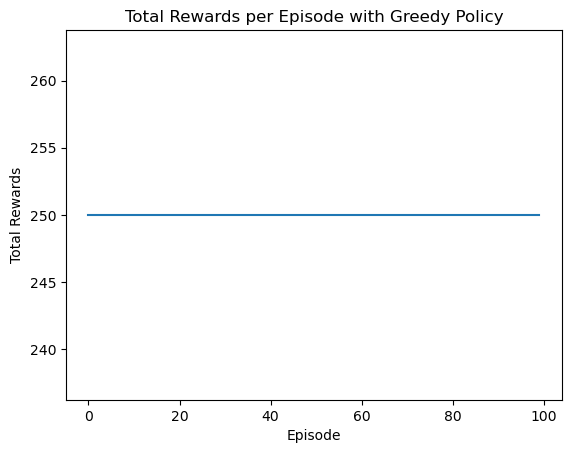

Trained Q Table 
{(0, 0): array([0.72759957, 0.52161906, 0.90047272, 0.15181117]),
 (0, 1): array([1.0727943 , 0.73080007, 0.28879006, 0.34742572]),
 (0, 2): array([0.2700531 , 0.8668055 , 0.86681275, 0.64887824]),
 (0, 3): array([0.40231182, 0.67399356, 0.8368241 , 0.05456685]),
 (1, 0): array([0.34209304, 0.8188477 , 0.46845894, 0.81039674]),
 (1, 1): array([5.02498067, 0.95305837, 0.54609111, 0.82146441]),
 (1, 2): array([6.70475921, 0.50609603, 0.81410061, 0.96663941]),
 (1, 3): array([0.36095374, 0.47118144, 0.41762104, 0.71073412]),
 (2, 0): array([0.82067413, 0.57850824, 4.26476285, 0.93385316]),
 (2, 1): array([28.80311072, 27.51566401, 49.643369  , 27.11912085]),
 (2, 2): array([21.32281801, 19.35574861, 20.8051662 , 33.16476966]),
 (2, 3): array([0.20310204, 0.20856761, 0.51416665, 0.23040011]),
 (3, 0): array([0.01964016, 0.74697683, 0.20019945, 0.93484611]),
 (3, 1): array([0.1490391 , 0.33120117, 0.50743012, 0.04085697]),
 (3, 2): array([0.1044677 , 0.91100633, 0.84642643,

In [68]:
eps = EpsilonGreedyQlearning(env=DeterministicEnvironment(timesteps=100), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.95)
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnDet.q_table.pkl')

### Hyperparameters Tuning
* Deterministic Environment

Here Discount factor and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.08083375, 0.94829657, 0.94030907, 0.67376192]),
 (0, 1): array([0.2180172 , 0.18226476, 0.87041649, 0.28698697]),
 (0, 2): array([0.04767156, 0.10935852, 0.05933494, 0.47103238]),
 (0, 3): array([0.41924508, 0.8382889 , 0.66887524, 0.33299095]),
 (1, 0): array([0.75010224, 0.09374279, 0.91855074, 0.73901883]),
 (1, 1): array([0.90827818, 0.87137127, 0.18091256, 0.68219413]),
 (1, 2): array([0.51843701, 0.78373775, 0.96910376, 0.8261334 ]),
 (1, 3): array([0.44321599, 0.20755372, 0.68075421, 0.69587423]),
 (2, 0): array([0.24592834, 0.65520952, 0.60775967, 0.38470941]),
 (2, 1): array([0.61746652, 0.99924778, 0.26108565, 0.63948795]),
 (2, 2): array([0.16851373, 0.70448795, 0.11781553, 0.36357302]),
 (2, 3): array([0.38244201, 0.55008477, 0.90265445, 0.51108324]),
 (3, 0): array([0.92573394, 0.79059305, 0.12152629, 0.60559662]),
 (3, 1): array([0.44654756, 0.68568269, 0.14884283, 0.04410431]),
 (3, 2): arra

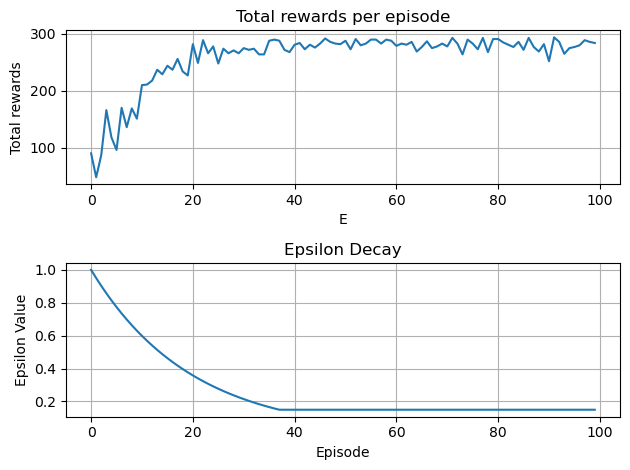

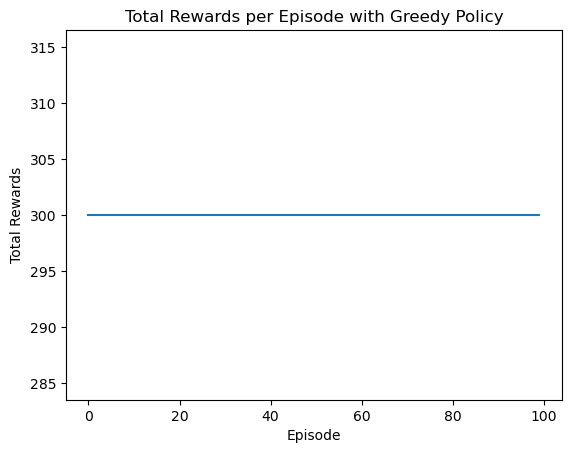

Trained Q Table 
{(0, 0): array([0.68692465, 0.7593308 , 0.74365695, 0.71260858]),
 (0, 1): array([6.43702603, 3.60810236, 3.43831324, 2.36545789]),
 (0, 2): array([0.22796189, 0.23180066, 0.22428851, 0.22537121]),
 (0, 3): array([0.41924508, 0.8382889 , 0.66887524, 0.33299095]),
 (1, 0): array([2.16542422, 2.83793277, 4.73668692, 2.57946367]),
 (1, 1): array([18.09182709, 11.70719186, 13.72864068, 12.438847  ]),
 (1, 2): array([29.98909702, 26.74522143, 26.42896279, 27.50625911]),
 (1, 3): array([0.44321599, 0.20755372, 0.68075421, 0.69587423]),
 (2, 0): array([ 6.08905611,  7.52577926, 13.87199552,  7.86854535]),
 (2, 1): array([28.90839466, 27.80811237, 29.99804957, 26.86499475]),
 (2, 2): array([30., 27., 30., 29.]),
 (2, 3): array([0.38244201, 0.55008477, 0.90265445, 0.51108324]),
 (3, 0): array([0.92573394, 0.79059305, 0.12152629, 0.60559662]),
 (3, 1): array([0.44654756, 0.68568269, 0.14884283, 0.04410431]),
 (3, 2): array([0.00792653, 0.16705426, 0.81099878, 0.30485524]),
 (3, 

In [69]:
eps = EpsilonGreedyQlearning(env=DeterministicEnvironment(timesteps=100), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.2, discount_factor = 0.9)
print('Here Discount factor and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnDet.q_table_1.pkl')

Here Discount factor and episode is tuned
Initial Q Table
{(0, 0): array([0.92575636, 0.41524082, 0.38831118, 0.51326012]),
 (0, 1): array([0.84564449, 0.12511456, 0.4995697 , 0.92922876]),
 (0, 2): array([0.16512701, 0.08004684, 0.1488201 , 0.50292581]),
 (0, 3): array([0.93459277, 0.79677526, 0.5860377 , 0.83571431]),
 (1, 0): array([0.05793807, 0.68552006, 0.17107225, 0.75171825]),
 (1, 1): array([0.75999861, 0.63090515, 0.6551969 , 0.5068275 ]),
 (1, 2): array([0.30074429, 0.69886615, 0.4463075 , 0.17973748]),
 (1, 3): array([0.25545263, 0.98597433, 0.17888578, 0.13144574]),
 (2, 0): array([0.76596035, 0.62212814, 0.97941713, 0.68285555]),
 (2, 1): array([0.71601062, 0.09842989, 0.52719073, 0.30548666]),
 (2, 2): array([0.22740558, 0.3016686 , 0.51486806, 0.14895632]),
 (2, 3): array([0.47511576, 0.29550193, 0.72217979, 0.66815671]),
 (3, 0): array([0.44625945, 0.50182675, 0.7224094 , 0.98698046]),
 (3, 1): array([0.8902753 , 0.2444795 , 0.82041384, 0.5966451 ]),
 (3, 2): array([0.

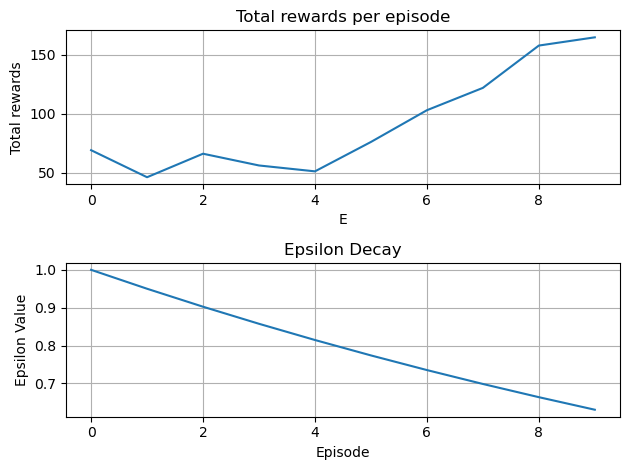

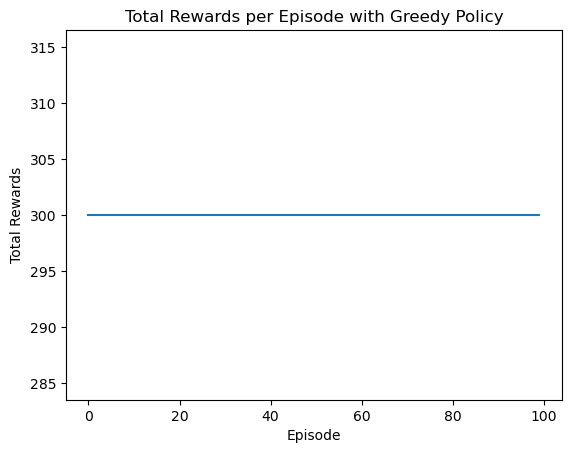

Trained Q Table 
{(0, 0): array([0.90469655, 0.49998167, 0.46066533, 0.56763387]),
 (0, 1): array([1.20821717, 0.31989544, 0.56750744, 0.93386113]),
 (0, 2): array([0.19723284, 0.12519518, 0.17459567, 0.49148487]),
 (0, 3): array([0.93459277, 0.79677526, 0.5860377 , 0.83571431]),
 (1, 0): array([0.17204084, 0.67995238, 0.4775941 , 0.70933831]),
 (1, 1): array([1.62541422, 0.74298261, 0.73158696, 0.64358457]),
 (1, 2): array([0.97015783, 0.68894062, 0.4752814 , 0.48314373]),
 (1, 3): array([0.25545263, 0.98597433, 0.17888578, 0.13144574]),
 (2, 0): array([0.83735697, 0.71061202, 1.5971565 , 0.74276745]),
 (2, 1): array([2.32357807, 0.80517283, 1.49161962, 0.57704249]),
 (2, 2): array([0.9822506 , 0.51421398, 2.39896941, 0.74484524]),
 (2, 3): array([0.47511576, 0.29550193, 0.72217979, 0.66815671]),
 (3, 0): array([0.44625945, 0.50182675, 0.7224094 , 0.98698046]),
 (3, 1): array([0.8902753 , 0.2444795 , 0.82041384, 0.5966451 ]),
 (3, 2): array([0.89582416, 0.51309402, 0.54151594, 0.56240

In [70]:
eps = EpsilonGreedyQlearning(env=DeterministicEnvironment(timesteps=100), epsilon=1, episodes = 10, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here Discount factor and episode is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnDet.q_table_2.pkl')

Here Discount factor and epsilon is tuned
Initial Q Table
{(0, 0): array([0.55865901, 0.69516858, 0.13133014, 0.805036  ]),
 (0, 1): array([0.4821809 , 0.11585382, 0.51153762, 0.02338507]),
 (0, 2): array([0.49847208, 0.29134742, 0.25914153, 0.09067406]),
 (0, 3): array([0.58841263, 0.14445082, 0.96002894, 0.69931032]),
 (1, 0): array([0.04374368, 0.06270836, 0.91484166, 0.20820884]),
 (1, 1): array([0.57250877, 0.77297465, 0.88804637, 0.486857  ]),
 (1, 2): array([0.52571011, 0.02408566, 0.61629189, 0.79276959]),
 (1, 3): array([0.27640704, 0.74459711, 0.19217075, 0.33925869]),
 (2, 0): array([0.49119855, 0.15015362, 0.47277468, 0.66103568]),
 (2, 1): array([0.78864533, 0.74071561, 0.57801599, 0.81438908]),
 (2, 2): array([0.86179015, 0.14292875, 0.10552635, 0.91236698]),
 (2, 3): array([0.22185674, 0.75462448, 0.88349892, 0.03076135]),
 (3, 0): array([0.65851084, 0.32380493, 0.07836146, 0.76271292]),
 (3, 1): array([0.97686911, 0.32358679, 0.37133568, 0.51890348]),
 (3, 2): array([0.

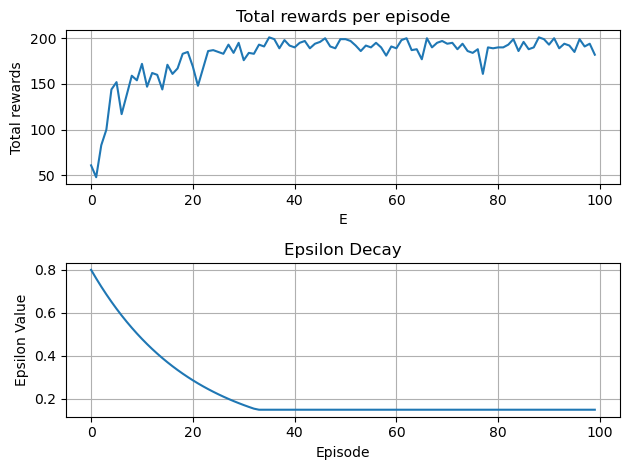

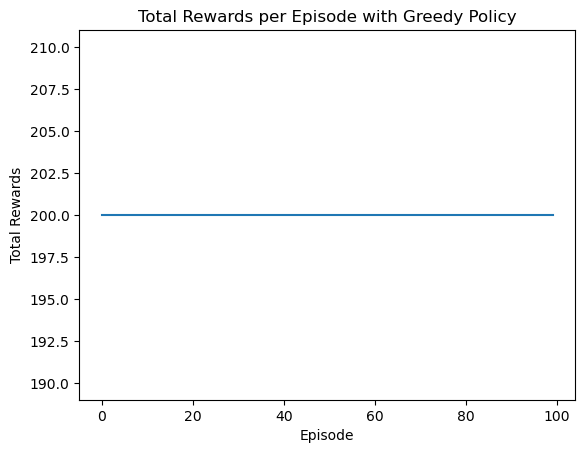

Trained Q Table 
{(0, 0): array([0.57814521, 0.69738531, 0.21287999, 0.76805664]),
 (0, 1): array([0.81936521, 0.17855784, 0.51404326, 0.06681695]),
 (0, 2): array([0.48810819, 0.30609004, 0.27875188, 0.11807406]),
 (0, 3): array([0.58841263, 0.14445082, 0.96002894, 0.69931032]),
 (1, 0): array([0.15062269, 0.21568907, 1.43561256, 0.32766263]),
 (1, 1): array([7.17517195, 1.15148058, 1.40419   , 1.1610138 ]),
 (1, 2): array([1.03484171, 0.15122521, 0.65866659, 1.43269627]),
 (1, 3): array([0.27640704, 0.74459711, 0.19217075, 0.33925869]),
 (2, 0): array([1.29776634, 0.69491484, 6.47921263, 1.38571038]),
 (2, 1): array([19.98025693, 17.41398497, 19.67164696, 16.33653448]),
 (2, 2): array([2.00934403, 0.82048325, 1.19907978, 6.91000642]),
 (2, 3): array([0.22185674, 0.75462448, 0.88349892, 0.03076135]),
 (3, 0): array([0.65851084, 0.32380493, 0.07836146, 0.76271292]),
 (3, 1): array([0.97686911, 0.32358679, 0.37133568, 0.51890348]),
 (3, 2): array([0.83971619, 0.73322067, 0.90589896, 0.8

In [71]:
eps = EpsilonGreedyQlearning(env=DeterministicEnvironment(timesteps=100), epsilon=0.8, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here Discount factor and epsilon is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnDet.q_table_2.pkl')

Here episode and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.18604987, 0.48526162, 0.04488254, 0.02842687]),
 (0, 1): array([0.98701339, 0.254811  , 0.53093819, 0.31689126]),
 (0, 2): array([0.26694469, 0.61070117, 0.7372586 , 0.24747102]),
 (0, 3): array([0.71652495, 0.1005758 , 0.75558969, 0.61395333]),
 (1, 0): array([0.29409385, 0.03660568, 0.46849388, 0.48742091]),
 (1, 1): array([0.11995202, 0.97761499, 0.27475934, 0.03727674]),
 (1, 2): array([0.1158112 , 0.38494421, 0.12443856, 0.72357653]),
 (1, 3): array([0.76921013, 0.87760086, 0.38578201, 0.68252664]),
 (2, 0): array([0.89175706, 0.48874332, 0.1192405 , 0.71274345]),
 (2, 1): array([0.53843082, 0.87969267, 0.72173848, 0.53353167]),
 (2, 2): array([0.90117273, 0.66709713, 0.71407389, 0.75276372]),
 (2, 3): array([0.10699913, 0.49420774, 0.3747036 , 0.59823847]),
 (3, 0): array([0.98898927, 0.30845219, 0.50897294, 0.65988687]),
 (3, 1): array([0.54558341, 0.22306258, 0.58532821, 0.61738014]),
 (3, 2): array([0.137

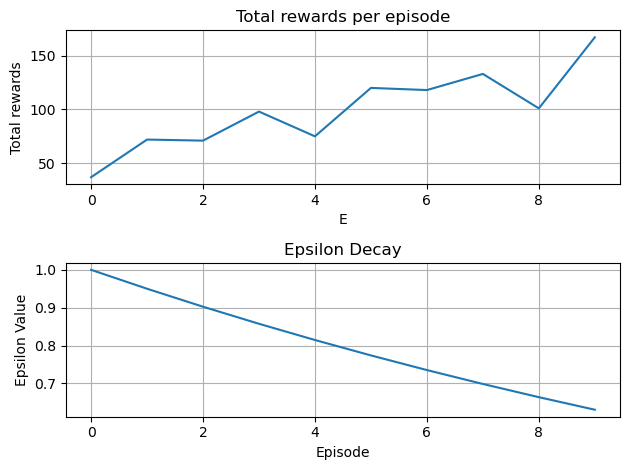

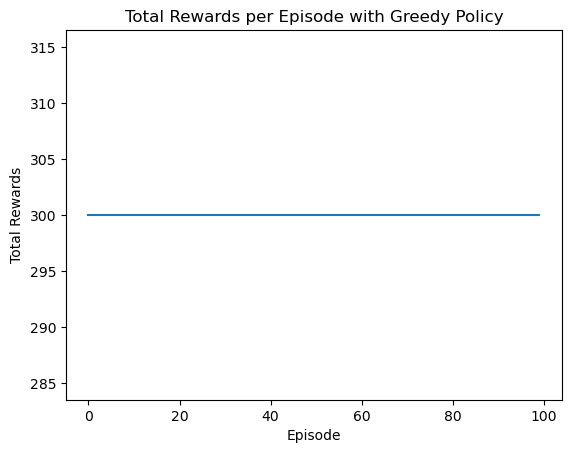

Trained Q Table 
{(0, 0): array([0.36177699, 0.36571351, 0.36462661, 0.36823633]),
 (0, 1): array([4.56098047, 3.41369846, 3.13294603, 3.25725194]),
 (0, 2): array([0.48029343, 0.46001124, 0.47304033, 0.4730522 ]),
 (0, 3): array([0.71652495, 0.1005758 , 0.75558969, 0.61395333]),
 (1, 0): array([4.0452054 , 4.21803084, 6.23676783, 3.74892632]),
 (1, 1): array([11.91562814,  9.09972977,  7.35537413,  8.92117127]),
 (1, 2): array([14.88292341,  9.57540852, 10.90594694, 11.95431399]),
 (1, 3): array([0.76921013, 0.87760086, 0.38578201, 0.68252664]),
 (2, 0): array([5.60493285, 6.82369487, 9.46536281, 6.25433622]),
 (2, 1): array([17.21579105, 15.08515556, 18.72002481, 14.24708001]),
 (2, 2): array([21.80600522, 17.74549212, 19.84505941, 19.8140036 ]),
 (2, 3): array([0.10699913, 0.49420774, 0.3747036 , 0.59823847]),
 (3, 0): array([0.98898927, 0.30845219, 0.50897294, 0.65988687]),
 (3, 1): array([0.54558341, 0.22306258, 0.58532821, 0.61738014]),
 (3, 2): array([0.13794   , 0.66081122, 0.9

In [99]:
eps = EpsilonGreedyQlearning(env=DeterministicEnvironment(timesteps=100), epsilon=1, episodes = 10, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.2, discount_factor = 0.9)
print('Here episode and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnDet.q_table_3.pkl')


Here episode and epsilon is tuned
Initial Q Table
{(0, 0): array([0.68706433, 0.90241109, 0.06375659, 0.56545676]),
 (0, 1): array([0.9553497 , 0.79663111, 0.54242518, 0.35446096]),
 (0, 2): array([0.04865182, 0.47612039, 0.8451608 , 0.95965776]),
 (0, 3): array([0.30942818, 0.24435574, 0.1250399 , 0.17987436]),
 (1, 0): array([0.4542262 , 0.42414458, 0.29560254, 0.30175325]),
 (1, 1): array([0.41943051, 0.80782907, 0.11489529, 0.54569619]),
 (1, 2): array([0.768229  , 0.43484948, 0.128001  , 0.99767432]),
 (1, 3): array([0.86117821, 0.16043531, 0.83775944, 0.99450148]),
 (2, 0): array([0.28765334, 0.92684251, 0.16370702, 0.96317609]),
 (2, 1): array([0.63374828, 0.81102532, 0.30657074, 0.05857394]),
 (2, 2): array([0.43050921, 0.09020707, 0.05014707, 0.20627686]),
 (2, 3): array([0.10648197, 0.26069708, 0.51710347, 0.59749437]),
 (3, 0): array([0.521486  , 0.13418998, 0.92209112, 0.01062665]),
 (3, 1): array([0.55959768, 0.21865728, 0.36802265, 0.64559183]),
 (3, 2): array([0.98969572

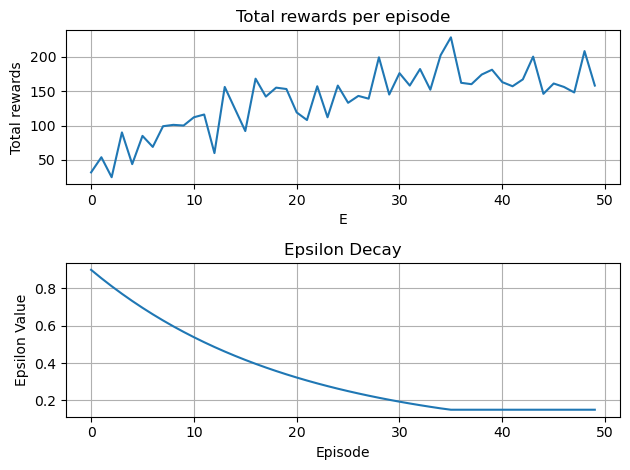

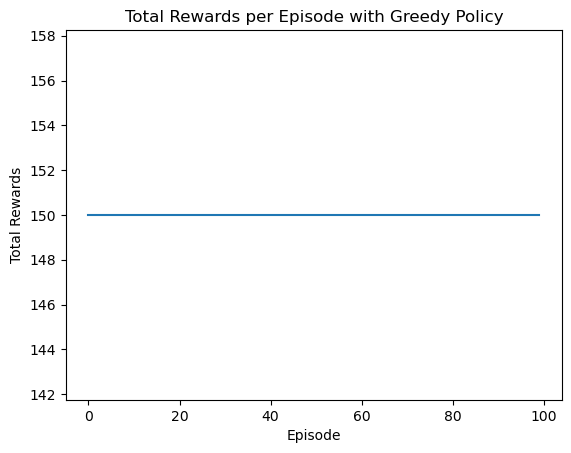

Trained Q Table 
{(0, 0): array([0.70615634, 0.79155917, 0.26606194, 0.63245373]),
 (0, 1): array([2.2701079 , 0.99761203, 0.72859189, 0.62262885]),
 (0, 2): array([0.16733449, 0.52508169, 0.84584723, 0.92293352]),
 (0, 3): array([0.30942818, 0.24435574, 0.1250399 , 0.17987436]),
 (1, 0): array([0.44918003, 0.44469088, 1.58151032, 0.36556843]),
 (1, 1): array([13.76915863,  3.66663724,  3.57447523,  4.00143514]),
 (1, 2): array([1.44736833, 0.58257007, 0.39182862, 2.18994578]),
 (1, 3): array([0.86117821, 0.16043531, 0.83775944, 0.99450148]),
 (2, 0): array([0.38855289, 0.86031998, 1.12536702, 0.85890078]),
 (2, 1): array([3.59729491, 6.81174097, 4.11820158, 2.13664949]),
 (2, 2): array([15.35070987,  2.38733647,  4.06002375,  3.85888248]),
 (2, 3): array([0.10648197, 0.26069708, 0.51710347, 0.59749437]),
 (3, 0): array([0.521486  , 0.13418998, 0.92209112, 0.01062665]),
 (3, 1): array([0.55959768, 0.21865728, 0.36802265, 0.64559183]),
 (3, 2): array([0.98969572, 0.15698482, 0.93790895,

In [73]:
eps = EpsilonGreedyQlearning(env=DeterministicEnvironment(timesteps=100), epsilon=0.9, episodes = 50, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here episode and epsilon is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnDet.q_table_4.pkl')

Here timesteps and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.15859647, 0.87132346, 0.14198682, 0.77129601]),
 (0, 1): array([0.14202208, 0.97989187, 0.57734072, 0.12752171]),
 (0, 2): array([0.9757672 , 0.60947618, 0.77805874, 0.79906691]),
 (0, 3): array([0.00618574, 0.61438247, 0.16332072, 0.80076764]),
 (1, 0): array([0.9021002 , 0.27579265, 0.27174818, 0.36672054]),
 (1, 1): array([0.10384062, 0.41287559, 0.58693994, 0.46665427]),
 (1, 2): array([0.5538664 , 0.55879454, 0.63303729, 0.63337336]),
 (1, 3): array([0.33340907, 0.49745486, 0.51987188, 0.89146302]),
 (2, 0): array([0.81427724, 0.56889628, 0.8124986 , 0.42849815]),
 (2, 1): array([0.24204041, 0.28410329, 0.67897271, 0.48114216]),
 (2, 2): array([0.94518096, 0.7314779 , 0.92953363, 0.44962343]),
 (2, 3): array([0.53224275, 0.90085619, 0.91065839, 0.0508436 ]),
 (3, 0): array([0.22994767, 0.78972424, 0.44076568, 0.97565365]),
 (3, 1): array([0.56869662, 0.06852283, 0.36814966, 0.24368768]),
 (3, 2): array([0.4

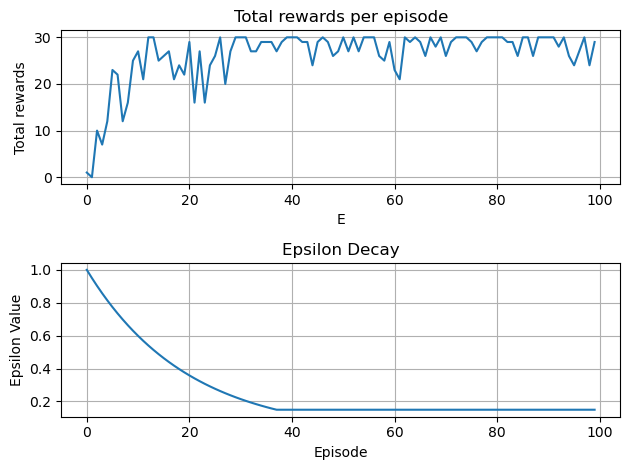

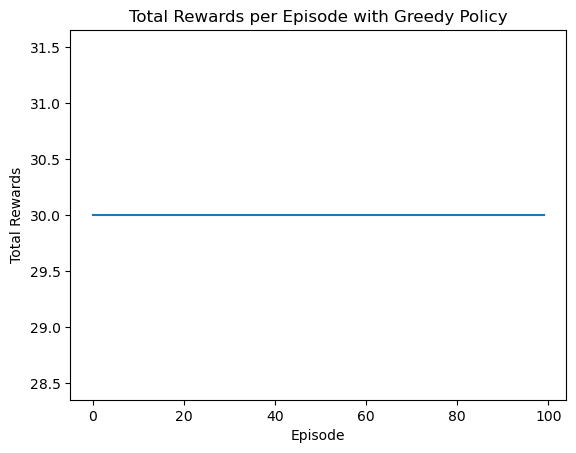

Trained Q Table 
{(0, 0): array([0.15859647, 0.87132346, 0.56391504, 0.77516454]),
 (0, 1): array([1.00277976, 0.92198026, 0.65307317, 0.353836  ]),
 (0, 2): array([0.81278676, 0.60947618, 0.81873064, 0.81490027]),
 (0, 3): array([0.00618574, 0.61438247, 0.16332072, 0.80076764]),
 (1, 0): array([0.84878608, 0.4293149 , 0.71939597, 0.49296442]),
 (1, 1): array([5.86093066, 0.41287559, 1.83888512, 0.49331181]),
 (1, 2): array([19.55422377,  7.62441963,  6.11885818, 10.44888357]),
 (1, 3): array([0.33340907, 0.49745486, 0.51987188, 0.89146302]),
 (2, 0): array([2.12895034, 0.65169604, 5.85067353, 0.58290095]),
 (2, 1): array([10.51382095,  8.67060057, 23.2786689 , 11.6386422 ]),
 (2, 2): array([29.99790761, 26.99807505, 29.99999998, 28.9995458 ]),
 (2, 3): array([0.53224275, 0.90085619, 0.91065839, 0.0508436 ]),
 (3, 0): array([0.22994767, 0.78972424, 0.44076568, 0.97565365]),
 (3, 1): array([0.56869662, 0.06852283, 0.36814966, 0.24368768]),
 (3, 2): array([0.4720181 , 0.47790864, 0.41512

In [74]:
eps = EpsilonGreedyQlearning(env=DeterministicEnvironment(timesteps=10), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.3, discount_factor = 0.9)
print('Here timesteps and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnDet.q_table_5.pkl')

Here timesteps and episodes is tuned
Initial Q Table
{(0, 0): array([0.13197023, 0.21565684, 0.12749821, 0.20636138]),
 (0, 1): array([0.66129675, 0.88557881, 0.62492114, 0.10811517]),
 (0, 2): array([0.59307448, 0.76787413, 0.91185879, 0.778628  ]),
 (0, 3): array([0.11032017, 0.1287629 , 0.16440767, 0.49284552]),
 (1, 0): array([0.07384872, 0.8852027 , 0.8514338 , 0.29894546]),
 (1, 1): array([0.10670464, 0.89186325, 0.57668919, 0.04882431]),
 (1, 2): array([0.18610611, 0.52991485, 0.70786001, 0.12039353]),
 (1, 3): array([0.3371465 , 0.64664023, 0.86683431, 0.10049564]),
 (2, 0): array([0.15950937, 0.75425793, 0.03894911, 0.87078157]),
 (2, 1): array([0.62884207, 0.5704378 , 0.73700999, 0.10394528]),
 (2, 2): array([0.99955908, 0.94352148, 0.87285531, 0.91501869]),
 (2, 3): array([0.19166055, 0.73875495, 0.02649413, 0.725248  ]),
 (3, 0): array([0.93205516, 0.1003314 , 0.42495999, 0.46522633]),
 (3, 1): array([0.00610961, 0.54824523, 0.39894343, 0.75523842]),
 (3, 2): array([0.01716

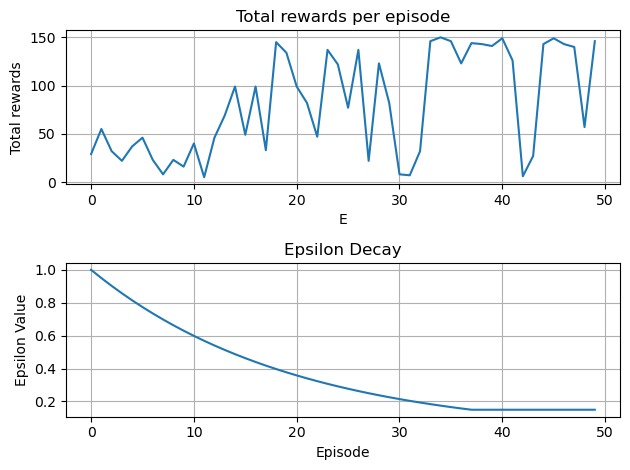

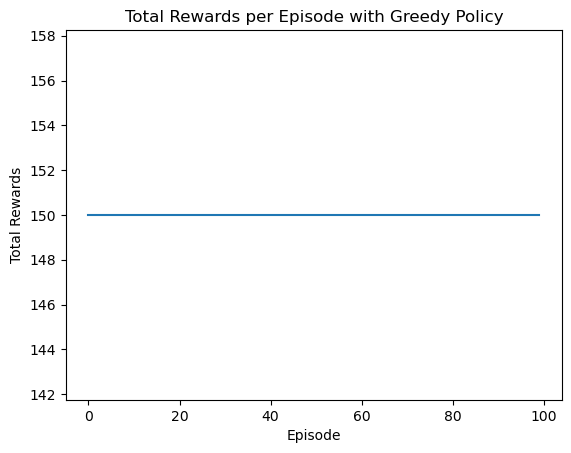

Trained Q Table 
{(0, 0): array([0.14124842, 0.19807523, 0.13911181, 0.1978901 ]),
 (0, 1): array([1.55832512, 0.84194601, 0.68115573, 0.25601928]),
 (0, 2): array([0.6387927 , 0.76954649, 0.77542265, 0.77500023]),
 (0, 3): array([0.11032017, 0.1287629 , 0.16440767, 0.49284552]),
 (1, 0): array([0.13724352, 0.87618896, 1.08691108, 0.33797697]),
 (1, 1): array([0.65738239, 0.79891757, 0.60381146, 0.16884948]),
 (1, 2): array([2.18228785, 0.59948741, 0.68193028, 0.48723459]),
 (1, 3): array([0.3371465 , 0.64664023, 0.86683431, 0.10049564]),
 (2, 0): array([0.24553655, 0.75592833, 0.39781638, 0.78708845]),
 (2, 1): array([1.07829737, 0.75230459, 2.77086461, 0.29375932]),
 (2, 2): array([19.28319359,  4.29513109,  6.14431471,  5.54957646]),
 (2, 3): array([0.19166055, 0.73875495, 0.02649413, 0.725248  ]),
 (3, 0): array([0.93205516, 0.1003314 , 0.42495999, 0.46522633]),
 (3, 1): array([0.00610961, 0.54824523, 0.39894343, 0.75523842]),
 (3, 2): array([0.01716607, 0.60475688, 0.52096978, 0.0

In [75]:
eps = EpsilonGreedyQlearning(env=DeterministicEnvironment(timesteps=50), epsilon=1, episodes = 50, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here timesteps and episodes is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnDet.q_table_6.pkl')

## Q learning with Stochastic Environment

Initial Q Table
{(0, 0): array([0.00438798, 0.4264889 , 0.98918079, 0.03603497]),
 (0, 1): array([0.93639781, 0.57840261, 0.02635167, 0.96892359]),
 (0, 2): array([0.80581546, 0.22255367, 0.01431766, 0.61612759]),
 (0, 3): array([0.48184715, 0.22818184, 0.8450699 , 0.75744021]),
 (1, 0): array([0.23966771, 0.56415906, 0.55141934, 0.86137184]),
 (1, 1): array([0.24108894, 0.2849663 , 0.49101428, 0.29796344]),
 (1, 2): array([0.30711756, 0.97264924, 0.08247249, 0.79827884]),
 (1, 3): array([0.78188324, 0.08526895, 0.92380485, 0.81451335]),
 (2, 0): array([0.0182485 , 0.25760546, 0.22546898, 0.37037062]),
 (2, 1): array([0.952498  , 0.04033051, 0.71671245, 0.50449769]),
 (2, 2): array([0.97202454, 0.49402558, 0.96961726, 0.08790333]),
 (2, 3): array([0.23208742, 0.50106456, 0.61303912, 0.32431498]),
 (3, 0): array([0.4949674 , 0.58066521, 0.36097715, 0.03467909]),
 (3, 1): array([0.0675567 , 0.24082921, 0.235399  , 0.40226331]),
 (3, 2): array([0.02343492, 0.56764965, 0.65150215, 0.718818

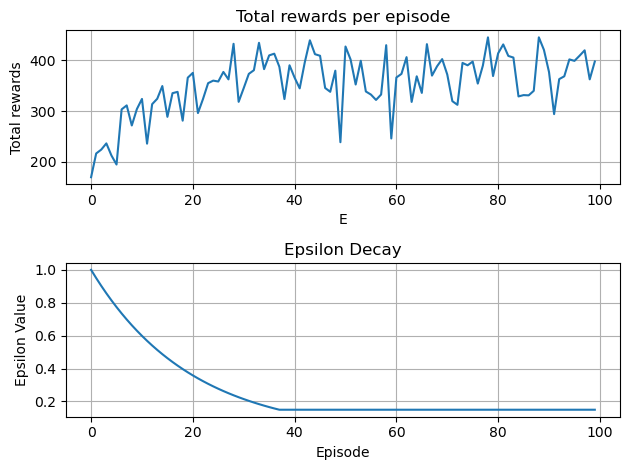

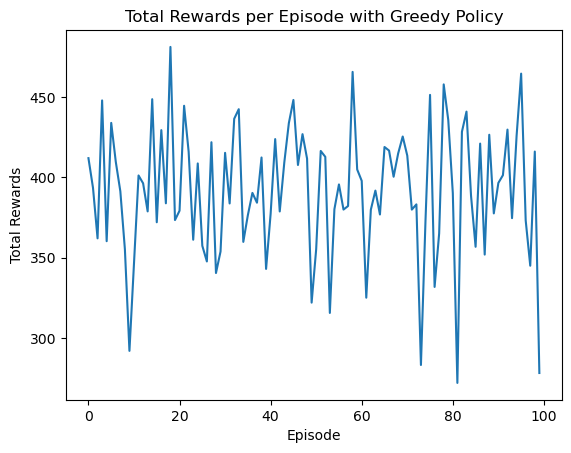

Trained Q Table 
{(0, 0): array([0.21105742, 0.50698644, 1.1856983 , 0.17611349]),
 (0, 1): array([2.82351226, 0.81281304, 0.57884363, 1.09387214]),
 (0, 2): array([2.16051054, 0.61053743, 0.39383191, 0.92344896]),
 (0, 3): array([0.48184715, 0.22818184, 0.8450699 , 0.75744021]),
 (1, 0): array([0.73576519, 0.73027628, 1.26041756, 2.28531025]),
 (1, 1): array([11.73465564,  1.54707605,  2.40112137,  1.67940561]),
 (1, 2): array([17.97443187,  3.55622842,  2.98204066,  4.41480454]),
 (1, 3): array([0.78188324, 0.08526895, 0.92380485, 0.81451335]),
 (2, 0): array([ 1.27449841,  1.62212641, 10.36298153,  1.30744062]),
 (2, 1): array([52.00397234, 26.81193183, 28.87044378, 28.22588881]),
 (2, 2): array([77.76094368, 45.46528737, 48.02224061, 45.37365167]),
 (2, 3): array([0.23208742, 0.50106456, 0.61303912, 0.32431498]),
 (3, 0): array([0.4949674 , 0.58066521, 0.36097715, 0.03467909]),
 (3, 1): array([0.0675567 , 0.24082921, 0.235399  , 0.40226331]),
 (3, 2): array([0.02343492, 0.56764965,

In [76]:
eps = EpsilonGreedyQlearning(env=StochasticEnvironment(timesteps=100), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.95)
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnSto.q_table.pkl')

### Hyperparameters tunning using stochastic environment

Here Discount factor and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.69826672, 0.40907789, 0.82784933, 0.24773975]),
 (0, 1): array([0.98086495, 0.52146918, 0.60175794, 0.43892085]),
 (0, 2): array([0.94105799, 0.91579397, 0.12113642, 0.31169687]),
 (0, 3): array([0.74917995, 0.47704003, 0.45624366, 0.05095099]),
 (1, 0): array([0.43140038, 0.79968654, 0.20161573, 0.75558961]),
 (1, 1): array([0.37079233, 0.76174123, 0.55972318, 0.67707835]),
 (1, 2): array([0.71371794, 0.61022882, 0.70478466, 0.67386727]),
 (1, 3): array([0.6976225 , 0.91858199, 0.4303895 , 0.55130076]),
 (2, 0): array([0.44103393, 0.24320772, 0.3125284 , 0.51485866]),
 (2, 1): array([0.20406406, 0.08257528, 0.76194692, 0.62709686]),
 (2, 2): array([0.5847637 , 0.11968873, 0.66308086, 0.64467588]),
 (2, 3): array([0.06932973, 0.54506078, 0.45405205, 0.60590073]),
 (3, 0): array([0.70688656, 0.79662961, 0.97578807, 0.91449946]),
 (3, 1): array([0.76027312, 0.93297828, 0.30843596, 0.3392782 ]),
 (3, 2): arra

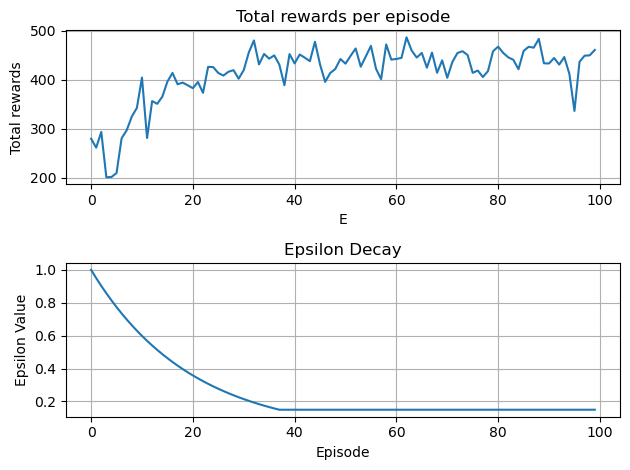

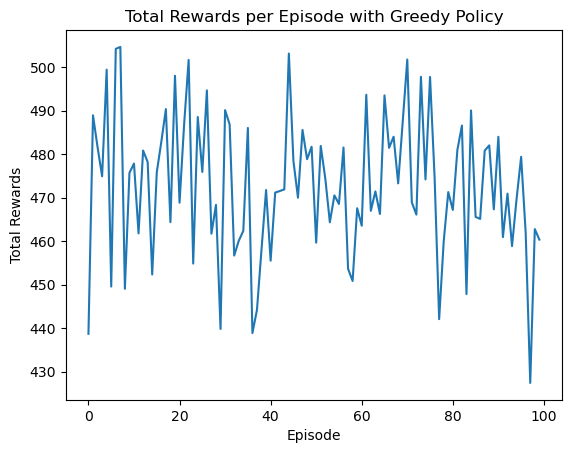

Trained Q Table 
{(0, 0): array([1.70431606, 1.08382741, 2.32104408, 1.30729395]),
 (0, 1): array([13.95923407,  6.04516408,  6.41823852,  5.23102783]),
 (0, 2): array([12.43362928,  7.91351004,  8.04915623,  8.36114493]),
 (0, 3): array([0.74917995, 0.47704003, 0.45624366, 0.05095099]),
 (1, 0): array([ 7.80458326,  7.31113807, 12.34060496,  7.19178611]),
 (1, 1): array([29.59143241, 24.84267374, 25.12919709, 25.94094488]),
 (1, 2): array([42.98234147, 38.80174578, 39.04464747, 39.49983954]),
 (1, 3): array([0.6976225 , 0.91858199, 0.4303895 , 0.55130076]),
 (2, 0): array([16.65438444, 16.98515226, 29.37809777, 17.98751126]),
 (2, 1): array([44.07671209, 43.37629908, 46.45506189, 43.03050792]),
 (2, 2): array([47.53992955, 44.96802763, 48.91584895, 47.01139533]),
 (2, 3): array([0.06932973, 0.54506078, 0.45405205, 0.60590073]),
 (3, 0): array([0.70688656, 0.79662961, 0.97578807, 0.91449946]),
 (3, 1): array([0.76027312, 0.93297828, 0.30843596, 0.3392782 ]),
 (3, 2): array([0.52302133,

In [77]:
eps = EpsilonGreedyQlearning(env=StochasticEnvironment(timesteps=100), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.2, discount_factor = 0.9)
print('Here Discount factor and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnSto.q_table_1.pkl')

Here Discount factor and episode is tuned
Initial Q Table
{(0, 0): array([0.19734072, 0.85744948, 0.37469487, 0.57866196]),
 (0, 1): array([0.51530196, 0.98766919, 0.67606022, 0.94091022]),
 (0, 2): array([0.96597038, 0.62941761, 0.29931594, 0.5124156 ]),
 (0, 3): array([0.47250544, 0.32606127, 0.08933464, 0.7309299 ]),
 (1, 0): array([0.16741526, 0.06485838, 0.44193743, 0.67287426]),
 (1, 1): array([0.20401972, 0.75743818, 0.56466486, 0.95393053]),
 (1, 2): array([0.28973639, 0.54826603, 0.14364627, 0.80628518]),
 (1, 3): array([0.89184761, 0.80595787, 0.82030379, 0.0679263 ]),
 (2, 0): array([0.92769407, 0.70832796, 0.45704026, 0.37596288]),
 (2, 1): array([0.80258878, 0.19891252, 0.35478014, 0.0989642 ]),
 (2, 2): array([0.27962944, 0.67988016, 0.61966941, 0.52384276]),
 (2, 3): array([0.29634835, 0.86957097, 0.20094902, 0.95592639]),
 (3, 0): array([0.97210516, 0.61679023, 0.70495869, 0.35623545]),
 (3, 1): array([0.54886077, 0.88359991, 0.291351  , 0.85102992]),
 (3, 2): array([0.

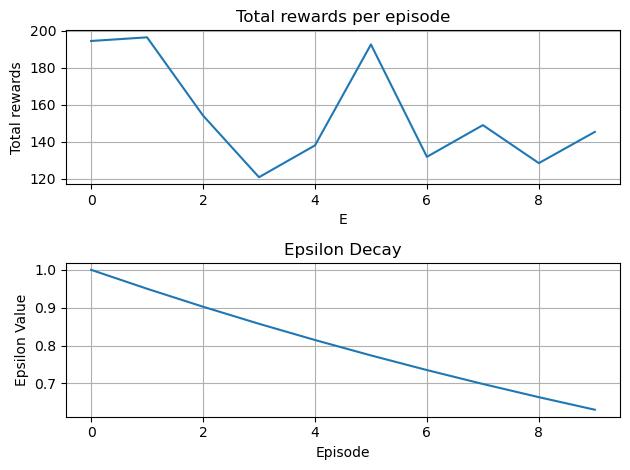

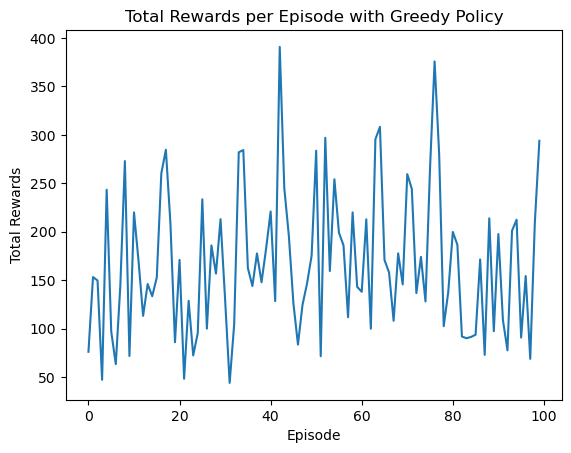

Trained Q Table 
{(0, 0): array([0.41550557, 0.85369002, 0.61253548, 0.63650066]),
 (0, 1): array([1.10842506, 1.21356466, 0.87421931, 0.97400027]),
 (0, 2): array([1.17188807, 0.77517952, 0.49636543, 0.68715982]),
 (0, 3): array([0.47250544, 0.32606127, 0.08933464, 0.7309299 ]),
 (1, 0): array([0.61939004, 0.34121299, 1.1848578 , 0.86707147]),
 (1, 1): array([0.97663937, 0.88865463, 0.93253682, 1.18515614]),
 (1, 2): array([1.24448267, 0.8469541 , 0.61463816, 1.40822264]),
 (1, 3): array([0.89184761, 0.80595787, 0.82030379, 0.0679263 ]),
 (2, 0): array([1.29256028, 0.97913286, 1.27734054, 0.64814942]),
 (2, 1): array([1.89774434, 0.84297241, 1.65793397, 0.39400121]),
 (2, 2): array([1.07716308, 1.28490327, 2.77661857, 1.19246067]),
 (2, 3): array([0.29634835, 0.86957097, 0.20094902, 0.95592639]),
 (3, 0): array([0.97210516, 0.61679023, 0.70495869, 0.35623545]),
 (3, 1): array([0.54886077, 0.88359991, 0.291351  , 0.85102992]),
 (3, 2): array([0.798129  , 0.08271709, 0.77646031, 0.14130

In [78]:
eps = EpsilonGreedyQlearning(env=StochasticEnvironment(timesteps=100), epsilon=1, episodes = 10, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here Discount factor and episode is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnSto.q_table_2.pkl')

Here Discount factor and epsilon is tuned
Initial Q Table
{(0, 0): array([0.62908206, 0.56849837, 0.85168607, 0.02466796]),
 (0, 1): array([0.26338025, 0.8485552 , 0.76251522, 0.11284523]),
 (0, 2): array([0.68752739, 0.40461023, 0.92170361, 0.56356944]),
 (0, 3): array([0.95585236, 0.63286161, 0.54339687, 0.96731788]),
 (1, 0): array([0.5226815 , 0.65568474, 0.74467597, 0.27034323]),
 (1, 1): array([0.27961316, 0.8954783 , 0.3850404 , 0.88721211]),
 (1, 2): array([0.30272993, 0.02824026, 0.39471402, 0.81584595]),
 (1, 3): array([0.25562506, 0.34851025, 0.10079267, 0.78713332]),
 (2, 0): array([0.28219356, 0.48093695, 0.26760296, 0.35802393]),
 (2, 1): array([0.80145981, 0.92131824, 0.28924974, 0.89566444]),
 (2, 2): array([0.40398442, 0.27495015, 0.85515762, 0.01050973]),
 (2, 3): array([0.1370683 , 0.20234284, 0.56494246, 0.82475436]),
 (3, 0): array([0.66007213, 0.44925798, 0.43496497, 0.91526083]),
 (3, 1): array([0.17802376, 0.84920789, 0.6078121 , 0.00904837]),
 (3, 2): array([0.

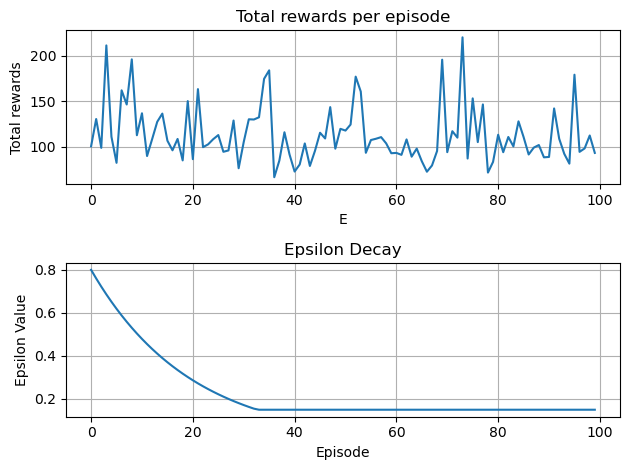

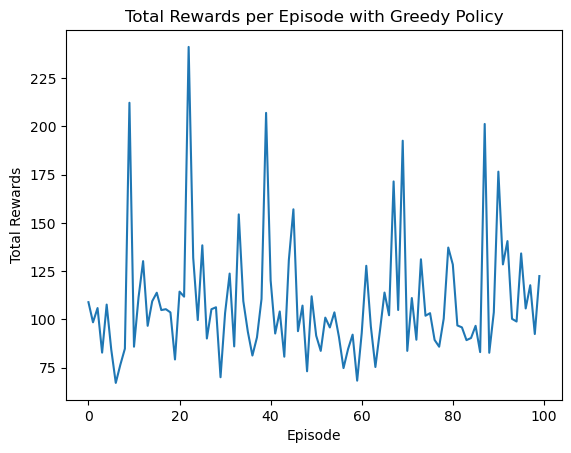

Trained Q Table 
{(0, 0): array([0.86134495, 0.65210054, 1.66775636, 0.3123715 ]),
 (0, 1): array([2.51573083, 2.83052484, 2.23052712, 1.66135573]),
 (0, 2): array([2.66763309, 2.06085312, 4.42492004, 1.93353672]),
 (0, 3): array([0.95585236, 0.63286161, 0.54339687, 0.96731788]),
 (1, 0): array([3.82730962, 3.63511081, 8.47187972, 3.75157712]),
 (1, 1): array([3.49334868, 2.15013952, 2.46188913, 3.75791302]),
 (1, 2): array([2.1290277 , 1.01650785, 1.14383395, 5.34471983]),
 (1, 3): array([0.25562506, 0.34851025, 0.10079267, 0.78713332]),
 (2, 0): array([0.524566  , 1.38222712, 0.89115162, 0.65532665]),
 (2, 1): array([1.33733758, 4.44159603, 1.54493219, 1.35045293]),
 (2, 2): array([ 1.72753441,  1.2764717 , 10.13978274,  1.34305604]),
 (2, 3): array([0.1370683 , 0.20234284, 0.56494246, 0.82475436]),
 (3, 0): array([0.66007213, 0.44925798, 0.43496497, 0.91526083]),
 (3, 1): array([0.17802376, 0.84920789, 0.6078121 , 0.00904837]),
 (3, 2): array([0.09078439, 0.39706536, 0.27570182, 0.2

In [79]:
eps = EpsilonGreedyQlearning(env=StochasticEnvironment(timesteps=100), epsilon=0.8, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.8)
print('Here Discount factor and epsilon is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnSto.q_table_3.pkl')

Here episode and epsilon is tuned
Initial Q Table
{(0, 0): array([0.34689036, 0.12993495, 0.12073314, 0.23130186]),
 (0, 1): array([0.04166475, 0.14357254, 0.17561413, 0.86985755]),
 (0, 2): array([0.08761568, 0.69991365, 0.69735588, 0.74816171]),
 (0, 3): array([0.94999287, 0.61922444, 0.35956388, 0.22869926]),
 (1, 0): array([0.65170337, 0.00519472, 0.36188797, 0.53925586]),
 (1, 1): array([0.1271137 , 0.11547977, 0.15664658, 0.53440606]),
 (1, 2): array([0.26172055, 0.04291857, 0.05408194, 0.63094358]),
 (1, 3): array([0.0121938 , 0.54586619, 0.98536899, 0.12928477]),
 (2, 0): array([0.91504802, 0.28105605, 0.62268866, 0.21322613]),
 (2, 1): array([0.00759337, 0.05709258, 0.01112313, 0.61502814]),
 (2, 2): array([0.50102078, 0.99536116, 0.45492037, 0.55970753]),
 (2, 3): array([0.15561767, 0.55845839, 0.57803934, 0.07497723]),
 (3, 0): array([0.01888747, 0.70093143, 0.73311905, 0.81435159]),
 (3, 1): array([0.36860112, 0.3205773 , 0.17098664, 0.68992808]),
 (3, 2): array([0.15312324

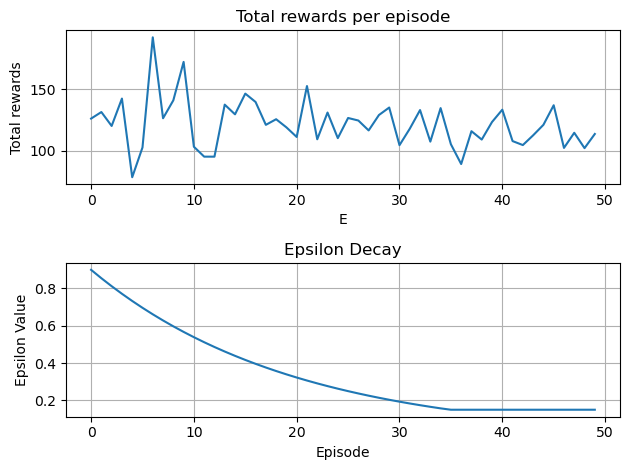

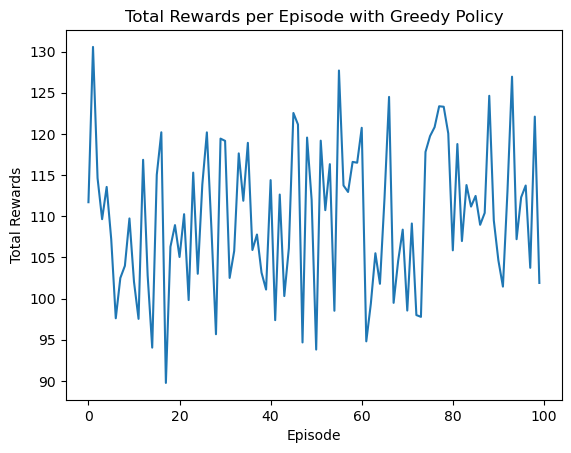

Trained Q Table 
{(0, 0): array([0.85700676, 0.24682423, 0.33857964, 0.34906716]),
 (0, 1): array([0.47587393, 0.32203341, 0.37715051, 1.00584064]),
 (0, 2): array([0.29410221, 0.77900693, 0.76304386, 0.89257234]),
 (0, 3): array([0.94999287, 0.61922444, 0.35956388, 0.22869926]),
 (1, 0): array([4.02373594, 0.95640592, 1.83373844, 1.32346061]),
 (1, 1): array([0.91766183, 0.3593542 , 0.70671652, 1.34153749]),
 (1, 2): array([1.3136303 , 0.25637231, 0.55257935, 2.20100747]),
 (1, 3): array([0.0121938 , 0.54586619, 0.98536899, 0.12928477]),
 (2, 0): array([10.01261999,  5.93323599,  8.36667948,  6.66949906]),
 (2, 1): array([1.44988779, 1.27029645, 1.97220496, 3.99394166]),
 (2, 2): array([0.84265543, 2.07849503, 0.9360252 , 1.11378105]),
 (2, 3): array([0.15561767, 0.55845839, 0.57803934, 0.07497723]),
 (3, 0): array([0.01888747, 0.70093143, 0.73311905, 0.81435159]),
 (3, 1): array([0.36860112, 0.3205773 , 0.17098664, 0.68992808]),
 (3, 2): array([0.15312324, 0.70811604, 0.70899214, 0.9

In [100]:
eps = EpsilonGreedyQlearning(env=StochasticEnvironment(timesteps=100), epsilon=0.9, episodes = 50, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here episode and epsilon is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnSto.q_table_4.pkl')

Here timesteps and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.00344855, 0.96528429, 0.51026231, 0.18533089]),
 (0, 1): array([0.34698562, 0.39451166, 0.71368259, 0.26377716]),
 (0, 2): array([0.96983262, 0.57717988, 0.04893297, 0.02031574]),
 (0, 3): array([0.94876396, 0.40793997, 0.81335449, 0.56706495]),
 (1, 0): array([0.62928562, 0.64556131, 0.45578425, 0.27297852]),
 (1, 1): array([0.81304115, 0.83612209, 0.63309332, 0.68916613]),
 (1, 2): array([0.0314674 , 0.25332936, 0.78801664, 0.14761921]),
 (1, 3): array([0.95771731, 0.98185505, 0.37861364, 0.40150368]),
 (2, 0): array([0.12488257, 0.61328502, 0.34093646, 0.40502966]),
 (2, 1): array([0.46531049, 0.0563871 , 0.42960545, 0.46297095]),
 (2, 2): array([0.6855238 , 0.96265047, 0.36261699, 0.84670891]),
 (2, 3): array([0.44198794, 0.9154733 , 0.7778176 , 0.3862327 ]),
 (3, 0): array([0.98483366, 0.25703051, 0.74938709, 0.59413468]),
 (3, 1): array([0.02868232, 0.11712472, 0.92192956, 0.13848279]),
 (3, 2): array([0.2

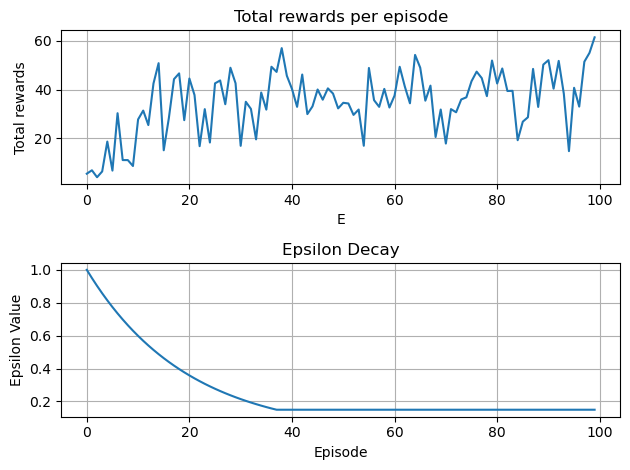

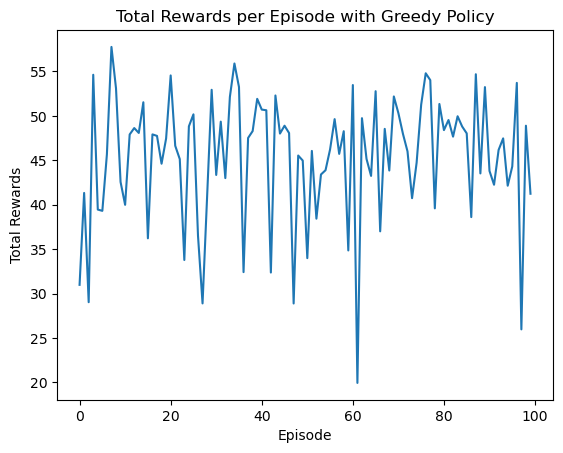

Trained Q Table 
{(0, 0): array([0.91952904, 0.87217076, 2.19320073, 0.93808856]),
 (0, 1): array([8.22364823, 3.51761636, 2.86890317, 2.28970482]),
 (0, 2): array([6.12928058, 1.48924785, 0.04893297, 0.80877977]),
 (0, 3): array([0.94876396, 0.40793997, 0.81335449, 0.56706495]),
 (1, 0): array([4.30494174, 3.56751168, 9.71515734, 1.90537704]),
 (1, 1): array([29.31873616,  5.73711799, 14.13885257, 10.05911994]),
 (1, 2): array([ 7.83887404, 10.03673765, 11.38157792, 17.54837198]),
 (1, 3): array([0.95771731, 0.98185505, 0.37861364, 0.40150368]),
 (2, 0): array([1.57315588, 4.57355912, 0.34093646, 2.21261391]),
 (2, 1): array([39.50967502,  3.664372  , 44.67429638, 34.46679271]),
 (2, 2): array([52.99064504, 45.0888718 , 48.90847272, 46.10141459]),
 (2, 3): array([0.44198794, 0.9154733 , 0.7778176 , 0.3862327 ]),
 (3, 0): array([0.98483366, 0.25703051, 0.74938709, 0.59413468]),
 (3, 1): array([0.02868232, 0.11712472, 0.92192956, 0.13848279]),
 (3, 2): array([0.23894293, 0.19063282, 0.6

In [81]:
eps = EpsilonGreedyQlearning(env=StochasticEnvironment(timesteps=10), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.3, discount_factor = 0.9)
print('Here timesteps and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnSto.q_table_5.pkl')

Here timesteps and episodes is tuned
Initial Q Table
{(0, 0): array([0.77218388, 0.70567807, 0.34926421, 0.13830417]),
 (0, 1): array([0.70177323, 0.52764558, 0.7296397 , 0.27799366]),
 (0, 2): array([0.69141737, 0.89015979, 0.90616741, 0.28726492]),
 (0, 3): array([0.56546661, 0.81347673, 0.30715541, 0.11094131]),
 (1, 0): array([0.51727653, 0.59608056, 0.24355884, 0.31810385]),
 (1, 1): array([0.61482008, 0.62152993, 0.92709071, 0.43152999]),
 (1, 2): array([0.60930522, 0.90464246, 0.98205201, 0.71230386]),
 (1, 3): array([0.80281076, 0.43127362, 0.6639667 , 0.53850387]),
 (2, 0): array([0.88962632, 0.85581966, 0.34633963, 0.49720366]),
 (2, 1): array([0.98460868, 0.02580966, 0.71117412, 0.78206105]),
 (2, 2): array([0.17720565, 0.53650283, 0.24960859, 0.22717052]),
 (2, 3): array([0.21873103, 0.45155376, 0.7010959 , 0.87779447]),
 (3, 0): array([0.78653582, 0.54681673, 0.32025321, 0.13901941]),
 (3, 1): array([1.54032077e-01, 1.18873288e-01, 7.10670976e-04, 8.66123939e-01]),
 (3, 2)

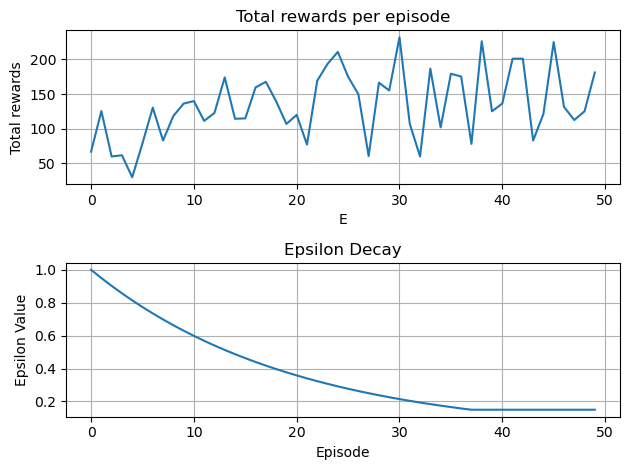

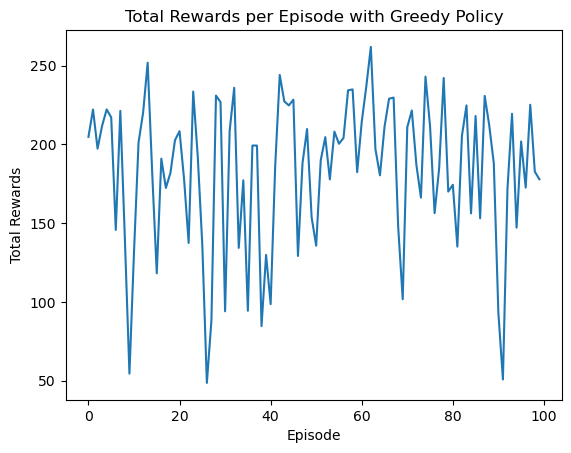

Trained Q Table 
{(0, 0): array([0.84525038, 0.70800599, 0.39656663, 0.24266658]),
 (0, 1): array([1.13955369, 0.58423838, 0.76429669, 0.30238442]),
 (0, 2): array([0.87633061, 1.48824882, 0.99428998, 0.4706632 ]),
 (0, 3): array([0.56546661, 0.81347673, 0.30715541, 0.11094131]),
 (1, 0): array([1.2113683 , 0.61770347, 0.66328201, 0.5489923 ]),
 (1, 1): array([1.288062  , 0.77163805, 2.07479768, 0.66267848]),
 (1, 2): array([5.75174401, 1.45782111, 1.30334942, 1.17806797]),
 (1, 3): array([0.80281076, 0.43127362, 0.6639667 , 0.53850387]),
 (2, 0): array([4.62980558, 1.61271506, 1.68199188, 1.57878399]),
 (2, 1): array([10.57648416,  2.50535015,  2.5307842 ,  2.18884294]),
 (2, 2): array([ 5.65771326,  4.47690664, 21.23723678,  4.45715459]),
 (2, 3): array([0.21873103, 0.45155376, 0.7010959 , 0.87779447]),
 (3, 0): array([0.78653582, 0.54681673, 0.32025321, 0.13901941]),
 (3, 1): array([1.54032077e-01, 1.18873288e-01, 7.10670976e-04, 8.66123939e-01]),
 (3, 2): array([0.05148106, 0.05124

In [82]:
eps = EpsilonGreedyQlearning(env=StochasticEnvironment(timesteps=50), epsilon=1, episodes = 50, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here timesteps and episodes is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('QlearnSto.q_table_6.pkl')

## 2.2 Defining second method (SARSA)

In [83]:
import numpy as np
import matplotlib.pyplot as plt

class SARSA:
    def __init__(self, env, epsilon, episodes, n_actions, max_timesteps, learning_rate, discount_factor):
        
        self.epsilon = epsilon
        self.q_table = {}
        self.env = env
        self.episodes = episodes
        self.max_timesteps = max_timesteps
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        print(self.q_table)
        for i in range(4):
            for j in range(4):
                self.q_table[tuple([i, j])] = np.random.rand(n_actions)
        
        # self.q_table[(0, 0)] = np.zeros(4)
        self.q_table[(3, 3)] = np.zeros(4)  # Assuming (3, 3) is the terminal state

        
    def select_action(self, state):
        if np.random.rand() > self.epsilon:
            return np.argmax(self.q_table[tuple(state)])
        
        else:
            return np.random.choice(4)
        
    def update_q_table(self, state, action, reward, next_state, next_action, learning_rate, discount_factor):
        # next_action = self.select_action(next_state)
        next_action = np.argmax(self.select_action(tuple(next_state)))

        next_q = self.q_table[tuple(next_state)][next_action]
        td_target = reward + self.discount_factor * next_q
        self.q_table[tuple(state)][action] += self.learning_rate * (td_target - self.q_table[tuple(state)][action])
        
    def epsilon_decay(self):
        epsilon_per_episode = []
        total_rewards_per_episode = []
        epsilon_threshold = 0.15
        for i in range(self.episodes):
            epsilon_per_episode.append(self.epsilon)
            state, info = self.env.reset()
            total_reward = 0
            terminated = False
            action = self.select_action(state)
            while not terminated:
                
                next_state, reward, terminated, truncated, info = self.env.step(action)
                next_action = self.select_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action, self.learning_rate, self.discount_factor)
                state = next_state
                total_reward += reward
            self.epsilon = max(0.95 * self.epsilon, epsilon_threshold)
            total_rewards_per_episode.append(total_reward)
        fig, axs = plt.subplots(2, 1)
        axs[0].plot(total_rewards_per_episode)
        axs[0].set_title('Total rewards per episode')
        axs[0].set_xlabel('Episode')
        axs[0].set_ylabel('Total rewards')
        axs[0].grid(True)
        
        
        axs[1].plot(epsilon_per_episode)
        axs[1].set_title('Epsilon Decay')
        axs[1].set_xlabel('Episode')
        axs[1].set_ylabel('Epsilon Value')
        axs[1].grid(True)
        plt.tight_layout()
        plt.show()

    def run_greedy_policy(self, episodes=100):
        total_rewards_per_episode = []
        for episode in range(episodes):
            state, info = self.env.reset()
            total_reward = 0
            terminated = False

            while not terminated:
                action = np.argmax(self.q_table[tuple(state)])  # Always choosing the best action
                next_state, reward, terminated, truncated, info = self.env.step(action)
                total_reward += reward
                state = next_state
            total_rewards_per_episode.append(total_reward)
        plt.plot(total_rewards_per_episode)
        plt.title('Total Rewards per Episode with Greedy Policy')
        plt.xlabel('Episode')
        plt.ylabel('Total Rewards')
        plt.show()
        
    def save(self, filename):
        with open(filename, 'wb') as f:
          pickle.dump(self.q_table, f)


    def load(self, filename):
        with open(filename, 'rb') as f:
          self.q_table = pickle.load(f)

## SARSA with Deterministic Environment

{}
Initial Q Table
{(0, 0): array([0.83778595, 0.65432056, 0.1047596 , 0.89387457]),
 (0, 1): array([0.78574223, 0.97009874, 0.95961543, 0.33483144]),
 (0, 2): array([0.96517626, 0.33191513, 0.0061471 , 0.56896566]),
 (0, 3): array([0.34196053, 0.22230405, 0.422418  , 0.65407289]),
 (1, 0): array([0.08918608, 0.56926475, 0.5610535 , 0.68803804]),
 (1, 1): array([0.28767517, 0.10955441, 0.80012348, 0.59967973]),
 (1, 2): array([0.36920933, 0.08365067, 0.53853388, 0.58987891]),
 (1, 3): array([0.21395172, 0.849745  , 0.30968199, 0.76267149]),
 (2, 0): array([0.18837811, 0.9867068 , 0.57433721, 0.24302808]),
 (2, 1): array([0.91477717, 0.38712466, 0.59477594, 0.92510687]),
 (2, 2): array([0.54755744, 0.97306569, 0.25872102, 0.79928026]),
 (2, 3): array([0.06984619, 0.77492691, 0.58980983, 0.17290052]),
 (3, 0): array([0.38303653, 0.7774505 , 0.80396468, 0.20935237]),
 (3, 1): array([0.77211055, 0.14786276, 0.02775172, 0.88510493]),
 (3, 2): array([0.29915111, 0.91591132, 0.63795176, 0.848

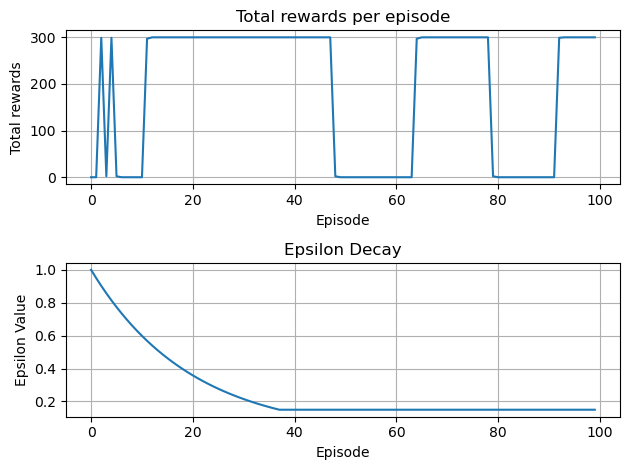

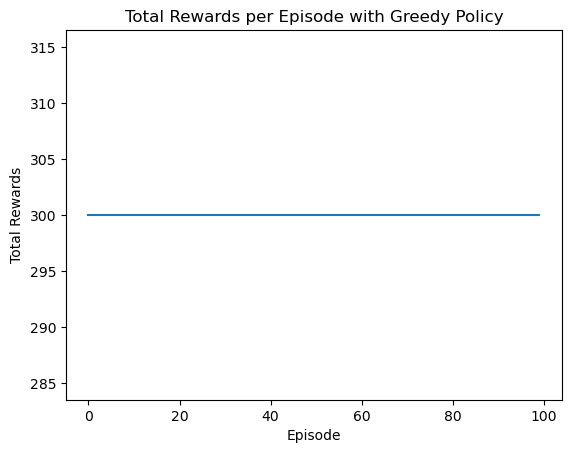

Trained Q Table 
{(0, 0): array([0.75259988, 0.7227218 , 0.1238186 , 0.74988659]),
 (0, 1): array([0.78574223, 0.97009874, 0.95828889, 0.33937055]),
 (0, 2): array([0.9532485 , 0.33191513, 0.89589529, 0.57074055]),
 (0, 3): array([0.34196053, 0.22230405, 0.422418  , 0.65407289]),
 (1, 0): array([0.0947127 , 0.59210789, 0.5610535 , 0.68803804]),
 (1, 1): array([0.28767517, 0.10955441, 0.80012348, 0.59967973]),
 (1, 2): array([0.89347316, 0.08365067, 0.53853388, 0.58987891]),
 (1, 3): array([0.21395172, 0.849745  , 0.30968199, 0.76267149]),
 (2, 0): array([0.1046168 , 0.87665256, 0.64249213, 0.14461188]),
 (2, 1): array([0.91477717, 0.38712466, 1.19765541, 0.89493425]),
 (2, 2): array([56.37998932,  0.97306569, 43.62980973,  0.88083699]),
 (2, 3): array([0.06984619, 0.77492691, 0.58980983, 0.17290052]),
 (3, 0): array([0.38303653, 0.7774505 , 0.80396468, 0.20935237]),
 (3, 1): array([0.77211055, 0.14786276, 0.02775172, 0.88510493]),
 (3, 2): array([0.29915111, 0.91591132, 0.63795176, 0.8

In [84]:
eps = SARSA(env=DeterministicEnvironment(timesteps=100), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.95)
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSADet.q_table.pkl')

## Hyperparameters tunning in SARSA with Deterministic Environment

{}
Here Discount factor and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.51684323, 0.23225127, 0.5772424 , 0.7112502 ]),
 (0, 1): array([0.83023842, 0.6285514 , 0.75765647, 0.41586955]),
 (0, 2): array([0.1008879 , 0.83393119, 0.56895537, 0.79104878]),
 (0, 3): array([0.21243222, 0.71408423, 0.24110696, 0.15188763]),
 (1, 0): array([0.72664463, 0.48534327, 0.42703697, 0.6709004 ]),
 (1, 1): array([0.16005446, 0.5467026 , 0.64598943, 0.30425422]),
 (1, 2): array([0.6357102 , 0.73528962, 0.70501442, 0.62499445]),
 (1, 3): array([0.57162179, 0.72313064, 0.52872583, 0.8497679 ]),
 (2, 0): array([0.94162401, 0.95058174, 0.27306043, 0.16229597]),
 (2, 1): array([0.11424178, 0.2688844 , 0.34570523, 0.85680774]),
 (2, 2): array([0.98491437, 0.33984006, 0.55689946, 0.10630645]),
 (2, 3): array([0.24457712, 0.68668662, 0.42580124, 0.7701041 ]),
 (3, 0): array([0.20830421, 0.13503747, 0.51898128, 0.92843359]),
 (3, 1): array([0.91952773, 0.75975288, 0.49564998, 0.18181951]),
 (3, 2): a

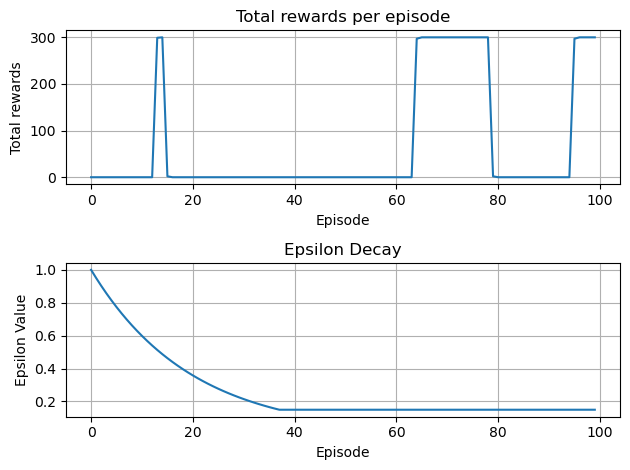

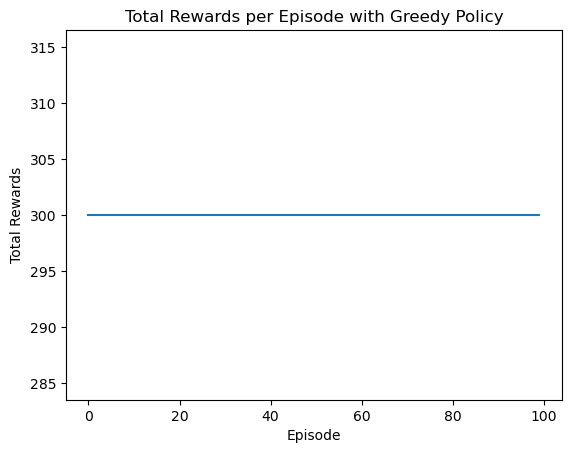

Trained Q Table 
{(0, 0): array([0.57056194, 0.51350575, 0.74700416, 0.51350575]),
 (0, 1): array([0.83023842, 0.6285514 , 0.15421345, 0.50362512]),
 (0, 2): array([0.38756402, 0.09079911, 0.17562434, 0.74729937]),
 (0, 3): array([0.21243222, 0.71408423, 0.24110696, 0.15188763]),
 (1, 0): array([0.62405125, 0.49227185, 0.42703697, 0.6709004 ]),
 (1, 1): array([0.16005446, 0.5467026 , 0.64598943, 0.30425422]),
 (1, 2): array([7.01599789, 0.73528962, 0.70501442, 0.62499445]),
 (1, 3): array([0.57162179, 0.72313064, 0.52872583, 0.8497679 ]),
 (2, 0): array([0.01795512, 0.79363652, 0.63901186, 0.11702414]),
 (2, 1): array([0.11424178, 0.2688844 , 1.05384877, 0.59048564]),
 (2, 2): array([29.9987095 ,  0.33984006, 29.99883855,  0.82505047]),
 (2, 3): array([0.24457712, 0.68668662, 0.42580124, 0.7701041 ]),
 (3, 0): array([0.20830421, 0.13503747, 0.51898128, 0.92843359]),
 (3, 1): array([0.91952773, 0.75975288, 0.49564998, 0.18181951]),
 (3, 2): array([0.05193635, 0.52532087, 0.60123488, 0.3

In [85]:
eps = SARSA(env=DeterministicEnvironment(timesteps=100), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.2, discount_factor = 0.9)
print('Here Discount factor and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSADet.q_table_1.pkl')


{}
Here Discount factor and episode is tuned
Initial Q Table
{(0, 0): array([0.84173412, 0.05636552, 0.87746511, 0.28163964]),
 (0, 1): array([0.29806696, 0.40836534, 0.91140049, 0.65931175]),
 (0, 2): array([0.13677701, 0.89741603, 0.26235261, 0.53924857]),
 (0, 3): array([0.16579032, 0.44497098, 0.95537686, 0.47231495]),
 (1, 0): array([0.86964763, 0.81118805, 0.65332228, 0.08369565]),
 (1, 1): array([0.75820405, 0.87816649, 0.54006667, 0.93998332]),
 (1, 2): array([0.14571994, 0.77359177, 0.40290048, 0.28528559]),
 (1, 3): array([0.93826542, 0.46918737, 0.83983228, 0.57687946]),
 (2, 0): array([0.14070661, 0.9693765 , 0.75598894, 0.09382282]),
 (2, 1): array([0.10613694, 0.45593386, 0.36166031, 0.80032048]),
 (2, 2): array([0.83787341, 0.39398378, 0.5573376 , 0.34500604]),
 (2, 3): array([0.67293322, 0.04354994, 0.48303082, 0.28331722]),
 (3, 0): array([0.34769847, 0.61658239, 0.86047944, 0.53504913]),
 (3, 1): array([0.92756229, 0.31224379, 0.2095332 , 0.66924049]),
 (3, 2): array(

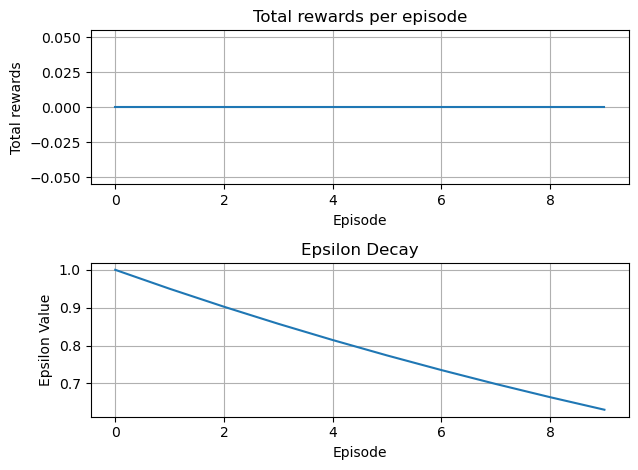

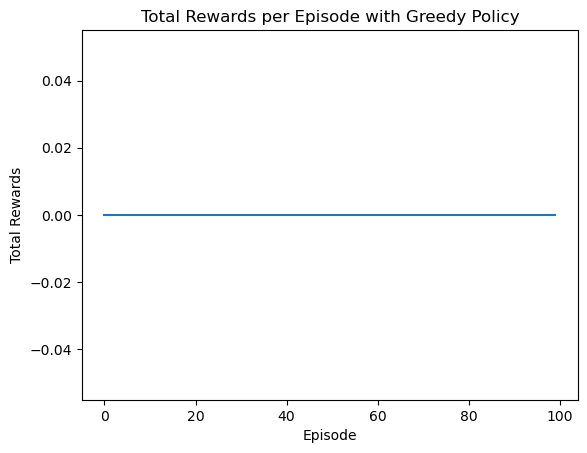

Trained Q Table 
{(0, 0): array([0.84173412, 0.05636552, 0.86534193, 0.57982119]),
 (0, 1): array([0.29806696, 0.40836534, 0.8957133 , 0.66029424]),
 (0, 2): array([0.13677701, 0.22684201, 0.12322692, 0.53653869]),
 (0, 3): array([0.16579032, 0.44497098, 0.95537686, 0.47231495]),
 (1, 0): array([0.86964763, 0.81118805, 0.65332228, 0.08369565]),
 (1, 1): array([0.75820405, 0.87816649, 0.54006667, 0.93998332]),
 (1, 2): array([0.14571994, 0.77359177, 0.40290048, 0.28528559]),
 (1, 3): array([0.93826542, 0.46918737, 0.83983228, 0.57687946]),
 (2, 0): array([0.14070661, 0.9693765 , 0.75598894, 0.09382282]),
 (2, 1): array([0.10613694, 0.45593386, 0.36166031, 0.80032048]),
 (2, 2): array([0.83787341, 0.39398378, 0.5573376 , 0.34500604]),
 (2, 3): array([0.67293322, 0.04354994, 0.48303082, 0.28331722]),
 (3, 0): array([0.34769847, 0.61658239, 0.86047944, 0.53504913]),
 (3, 1): array([0.92756229, 0.31224379, 0.2095332 , 0.66924049]),
 (3, 2): array([0.78315064, 0.56129604, 0.61438596, 0.12421

In [101]:
eps = SARSA(env=DeterministicEnvironment(timesteps=100), epsilon=1, episodes = 10, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here Discount factor and episode is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSADet.q_table_2.pkl')

{}
Here Discount factor and epsilon is tuned
Initial Q Table
{(0, 0): array([0.15522315, 0.611768  , 0.07501408, 0.2689772 ]),
 (0, 1): array([0.20962322, 0.4262592 , 0.52567174, 0.47003457]),
 (0, 2): array([0.74160669, 0.19980182, 0.21515724, 0.92042195]),
 (0, 3): array([0.96618946, 0.70786277, 0.68872617, 0.13828296]),
 (1, 0): array([0.23404574, 0.69060002, 0.68705822, 0.50508113]),
 (1, 1): array([0.57601414, 0.11054525, 0.75950814, 0.39457988]),
 (1, 2): array([0.88312623, 0.11492847, 0.73642301, 0.80112948]),
 (1, 3): array([0.66406093, 0.52934084, 0.91204964, 0.93912307]),
 (2, 0): array([0.0536681 , 0.40852311, 0.48719183, 0.04025144]),
 (2, 1): array([0.9423985 , 0.50256265, 0.22675638, 0.49016933]),
 (2, 2): array([0.27953819, 0.72691121, 0.16002466, 0.7846732 ]),
 (2, 3): array([0.89087909, 0.08897156, 0.39771169, 0.48108373]),
 (3, 0): array([1.18095865e-04, 4.50127919e-01, 1.88918537e-01, 2.13355727e-01]),
 (3, 1): array([0.31880588, 0.63705285, 0.42982157, 0.63655989]),

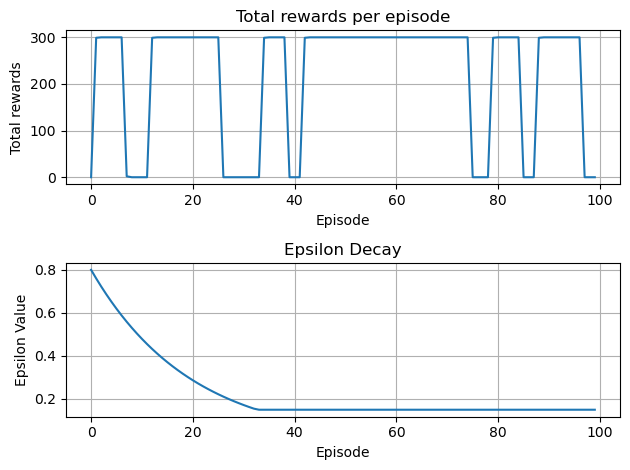

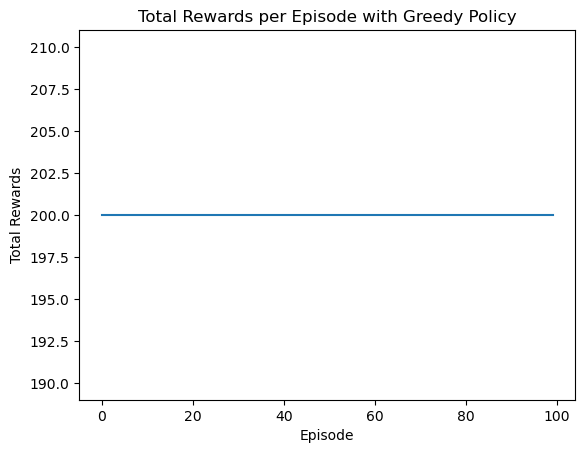

Trained Q Table 
{(0, 0): array([0.15863574, 0.14925097, 0.07615055, 0.14228064]),
 (0, 1): array([0.20962322, 0.4262592 , 0.52708948, 0.45080411]),
 (0, 2): array([0.74160669, 0.66404851, 0.60561814, 0.8775994 ]),
 (0, 3): array([0.96618946, 0.70786277, 0.68872617, 0.13828296]),
 (1, 0): array([0.2206286 , 0.68509601, 0.68705822, 0.50508113]),
 (1, 1): array([0.57601414, 0.11054525, 0.75950814, 0.39457988]),
 (1, 2): array([0.88312623, 0.14200733, 0.73642301, 0.80112948]),
 (1, 3): array([0.66406093, 0.52934084, 0.91204964, 0.93912307]),
 (2, 0): array([0.02701725, 0.40652758, 0.62535526, 0.03429979]),
 (2, 1): array([0.9423985 , 0.50256265, 0.61032211, 0.48570554]),
 (2, 2): array([10.08176537,  0.7302391 , 12.07358476,  0.80530805]),
 (2, 3): array([0.89087909, 0.08897156, 0.39771169, 0.48108373]),
 (3, 0): array([1.18095865e-04, 4.50127919e-01, 1.88918537e-01, 2.13355727e-01]),
 (3, 1): array([0.31880588, 0.63705285, 0.42982157, 0.63655989]),
 (3, 2): array([0.7761319 , 0.26403989,

In [102]:
eps = SARSA(env=DeterministicEnvironment(timesteps=100), epsilon=0.8, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here Discount factor and epsilon is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSADet.q_table_3.pkl')

{}
Here episode and epsilon is tuned
Initial Q Table
{(0, 0): array([0.75302762, 0.39966395, 0.39442083, 0.56257889]),
 (0, 1): array([0.96860565, 0.24150672, 0.26582978, 0.14689805]),
 (0, 2): array([0.17389034, 0.05151728, 0.86827074, 0.98756919]),
 (0, 3): array([0.20469175, 0.25798146, 0.11513132, 0.87975782]),
 (1, 0): array([0.98267206, 0.60814011, 0.29960422, 0.17904578]),
 (1, 1): array([0.80046493, 0.56494509, 0.15126903, 0.99283072]),
 (1, 2): array([0.49415325, 0.43717328, 0.79355466, 0.16414293]),
 (1, 3): array([0.77174901, 0.17711818, 0.61675834, 0.54971793]),
 (2, 0): array([0.59703179, 0.61950711, 0.09166706, 0.65216073]),
 (2, 1): array([0.40292543, 0.75664401, 0.79317248, 0.43837671]),
 (2, 2): array([0.29425839, 0.93853451, 0.32845573, 0.63537336]),
 (2, 3): array([0.0130519 , 0.46028212, 0.3433529 , 0.22751664]),
 (3, 0): array([0.09267402, 0.34833048, 0.74760357, 0.03607579]),
 (3, 1): array([0.07593499, 0.56254642, 0.58550697, 0.16194009]),
 (3, 2): array([0.84601

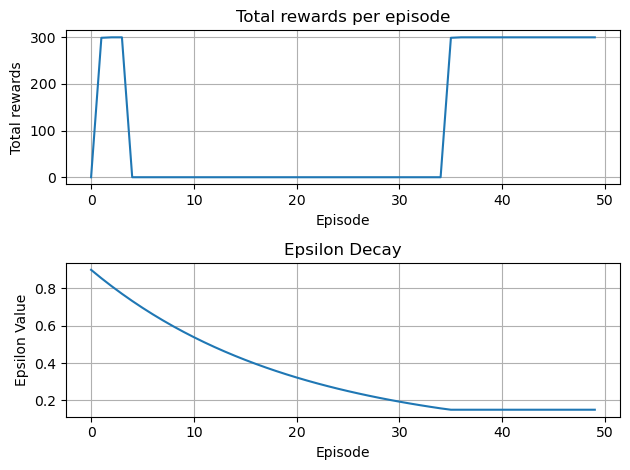

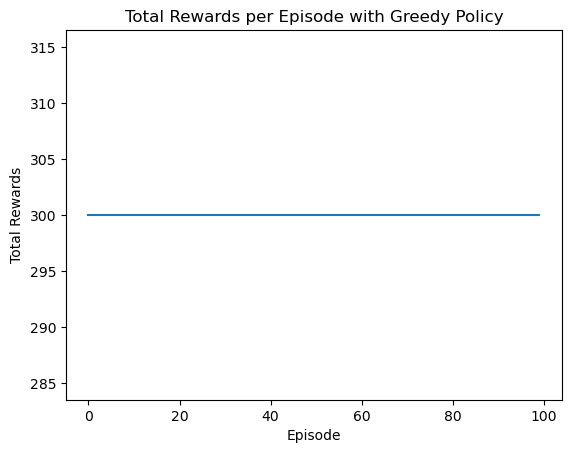

Trained Q Table 
{(0, 0): array([0.76323981, 0.68585727, 0.39442083, 0.63546277]),
 (0, 1): array([0.96860565, 0.24150672, 0.26582978, 0.15221815]),
 (0, 2): array([0.17389034, 0.11729352, 0.41703194, 0.98641095]),
 (0, 3): array([0.20469175, 0.25798146, 0.11513132, 0.87975782]),
 (1, 0): array([0.91702252, 0.61395745, 0.29960422, 0.17904578]),
 (1, 1): array([0.80046493, 0.56494509, 0.15126903, 0.99283072]),
 (1, 2): array([0.49415325, 0.43436656, 0.79355466, 0.16414293]),
 (1, 3): array([0.77174901, 0.17711818, 0.61675834, 0.54971793]),
 (2, 0): array([0.15009672, 0.63765903, 0.13685928, 0.25762181]),
 (2, 1): array([0.40292543, 0.75664401, 0.84235852, 0.43837671]),
 (2, 2): array([0.29425839, 0.93359655, 3.26483251, 0.63537336]),
 (2, 3): array([0.0130519 , 0.46028212, 0.3433529 , 0.22751664]),
 (3, 0): array([0.09267402, 0.34833048, 0.74760357, 0.03607579]),
 (3, 1): array([0.07593499, 0.56254642, 0.58550697, 0.16194009]),
 (3, 2): array([0.84601509, 0.95785658, 0.24040954, 0.69938

In [89]:
eps = SARSA(env=DeterministicEnvironment(timesteps=100), epsilon=0.9, episodes = 50, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here episode and epsilon is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSADet.q_table_4.pkl')

{}
Here timesteps and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.56842879, 0.73982897, 0.98245417, 0.82698575]),
 (0, 1): array([0.19416442, 0.58424613, 0.57662564, 0.74498006]),
 (0, 2): array([0.69096713, 0.33354544, 0.25594166, 0.47928136]),
 (0, 3): array([0.80389186, 0.62270588, 0.27879786, 0.23708923]),
 (1, 0): array([0.21935395, 0.4010721 , 0.32638978, 0.00388463]),
 (1, 1): array([0.73847301, 0.73557025, 0.68889292, 0.90968646]),
 (1, 2): array([0.34157734, 0.32394396, 0.32078279, 0.4898994 ]),
 (1, 3): array([0.53324703, 0.58318351, 0.9791697 , 0.94591775]),
 (2, 0): array([0.78275799, 0.60745383, 0.23444899, 0.7405515 ]),
 (2, 1): array([0.39793828, 0.47229831, 0.51767635, 0.16761926]),
 (2, 2): array([0.23092275, 0.9213863 , 0.75007107, 0.85983979]),
 (2, 3): array([0.85784067, 0.7703308 , 0.97032721, 0.42426797]),
 (3, 0): array([0.88311585, 0.33035604, 0.26158113, 0.84513027]),
 (3, 1): array([0.61804445, 0.6743923 , 0.92583865, 0.11654885]),
 (3, 2): array([

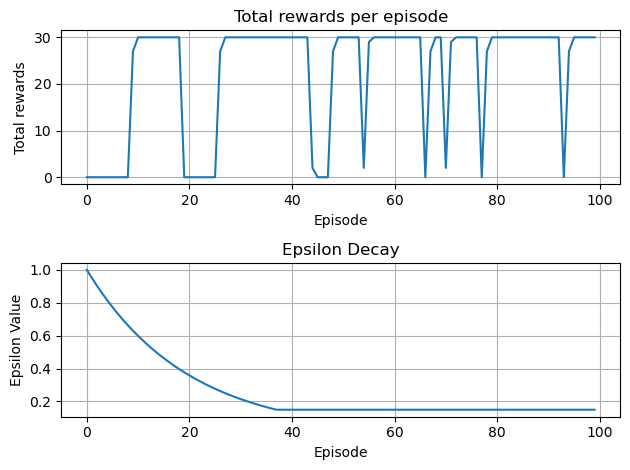

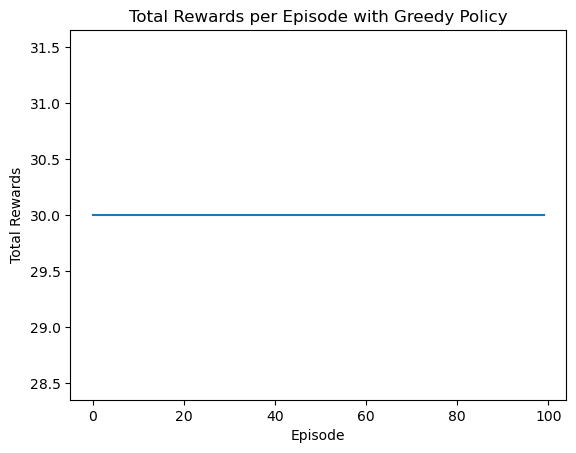

Trained Q Table 
{(0, 0): array([0.41850896, 0.37679276, 0.4517912 , 0.41159078]),
 (0, 1): array([0.19416442, 0.58424613, 0.59447478, 0.64490998]),
 (0, 2): array([12.28403927,  7.89495585,  0.65455941,  0.38792134]),
 (0, 3): array([0.80389186, 0.62270588, 0.27879786, 0.23708923]),
 (1, 0): array([0.42106467, 0.39014108, 0.32638978, 0.00388463]),
 (1, 1): array([0.73847301, 0.73557025, 0.68889292, 0.90968646]),
 (1, 2): array([24.54942562,  3.93320704,  0.32078279,  0.4898994 ]),
 (1, 3): array([0.53324703, 0.58318351, 0.9791697 , 0.94591775]),
 (2, 0): array([0.35456234, 0.44990061, 1.31753367, 0.31910838]),
 (2, 1): array([ 0.39793828,  0.47229831, 15.55228712,  0.26714612]),
 (2, 2): array([29.99999994, 11.76442003, 29.9715495 ,  1.84422595]),
 (2, 3): array([0.85784067, 0.7703308 , 0.97032721, 0.42426797]),
 (3, 0): array([0.88311585, 0.33035604, 0.26158113, 0.84513027]),
 (3, 1): array([0.61804445, 0.6743923 , 0.92583865, 0.11654885]),
 (3, 2): array([0.6028274 , 0.16548791, 0.3

In [90]:
eps = SARSA(env=DeterministicEnvironment(timesteps=10), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.3, discount_factor = 0.9)
print('Here timesteps and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSADet.q_table_5.pkl')

{}
Here timesteps and episodes is tuned
Initial Q Table
{(0, 0): array([0.71608729, 0.75822161, 0.51724785, 0.89416985]),
 (0, 1): array([0.71377299, 0.08133331, 0.62245768, 0.72633611]),
 (0, 2): array([0.58381126, 0.34794745, 0.35062761, 0.0878975 ]),
 (0, 3): array([0.38972072, 0.89919691, 0.57810261, 0.22393864]),
 (1, 0): array([0.53316864, 0.225273  , 0.42134162, 0.86295911]),
 (1, 1): array([0.86992692, 0.48602268, 0.75529242, 0.36751546]),
 (1, 2): array([0.33684444, 0.38908779, 0.86010204, 0.7378615 ]),
 (1, 3): array([0.83979027, 0.62736653, 0.38344562, 0.36240166]),
 (2, 0): array([0.76273023, 0.61117563, 0.30436694, 0.40611523]),
 (2, 1): array([0.71333632, 0.37513756, 0.60056769, 0.81485137]),
 (2, 2): array([0.92975099, 0.33849942, 0.98321763, 0.51229683]),
 (2, 3): array([0.45192282, 0.33642717, 0.99645055, 0.30483313]),
 (3, 0): array([0.12660778, 0.60631498, 0.54711368, 0.77631782]),
 (3, 1): array([0.93900687, 0.93311907, 0.56676153, 0.42573322]),
 (3, 2): array([0.83

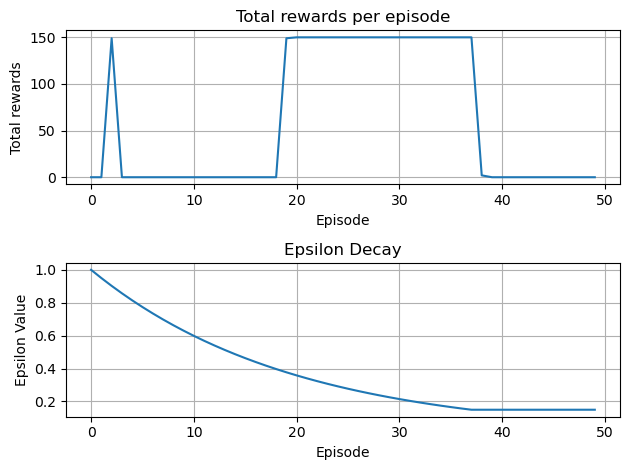

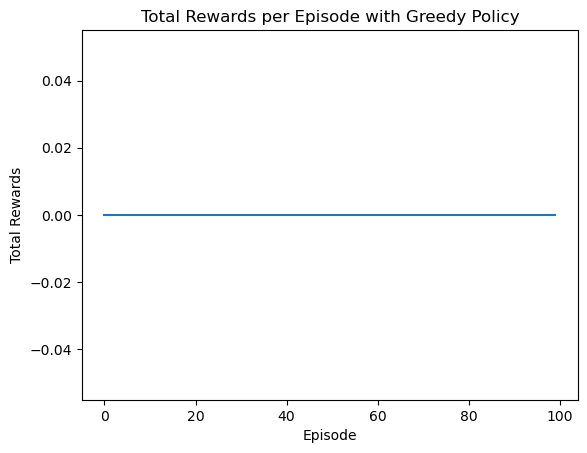

Trained Q Table 
{(0, 0): array([0.69139393, 0.62821597, 0.51724785, 0.66830137]),
 (0, 1): array([0.71377299, 0.08133331, 0.62245768, 0.72549628]),
 (0, 2): array([0.58381126, 0.41587182, 0.35062761, 0.09344248]),
 (0, 3): array([0.38972072, 0.89919691, 0.57810261, 0.22393864]),
 (1, 0): array([0.52773359, 0.26045064, 0.42134162, 0.86295911]),
 (1, 1): array([0.86992692, 0.48602268, 0.75529242, 0.36751546]),
 (1, 2): array([0.33684444, 0.39045122, 0.86010204, 0.7378615 ]),
 (1, 3): array([0.83979027, 0.62736653, 0.38344562, 0.36240166]),
 (2, 0): array([0.38705437, 0.59983724, 0.35088589, 0.42018986]),
 (2, 1): array([0.71333632, 0.37513756, 0.66496824, 0.81113177]),
 (2, 2): array([0.92975099, 0.33814603, 3.83664764, 0.53359388]),
 (2, 3): array([0.45192282, 0.33642717, 0.99645055, 0.30483313]),
 (3, 0): array([0.12660778, 0.60631498, 0.54711368, 0.77631782]),
 (3, 1): array([0.93900687, 0.93311907, 0.56676153, 0.42573322]),
 (3, 2): array([0.83541253, 0.42401336, 0.93207962, 0.08867

In [91]:
eps = SARSA(env=DeterministicEnvironment(timesteps=50), epsilon=1, episodes = 50, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here timesteps and episodes is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSADet.q_table_6.pkl')

### SARSA with Stochastic Environment

{}
Initial Q Table
{(0, 0): array([0.21432251, 0.9270497 , 0.2756195 , 0.58472755]),
 (0, 1): array([0.91541887, 0.52018434, 0.11322155, 0.20608368]),
 (0, 2): array([0.19451045, 0.5826044 , 0.59041206, 0.13859629]),
 (0, 3): array([0.55641679, 0.06751721, 0.4141209 , 0.66639199]),
 (1, 0): array([0.78304779, 0.44497745, 0.39811629, 0.06033341]),
 (1, 1): array([0.52810889, 0.23650231, 0.67139158, 0.03991364]),
 (1, 2): array([0.93162777, 0.37665518, 0.44010366, 0.93535227]),
 (1, 3): array([0.56473693, 0.89741881, 0.35476344, 0.69921446]),
 (2, 0): array([0.61576141, 0.88605721, 0.55774588, 0.93886416]),
 (2, 1): array([0.77827265, 0.30251629, 0.6270242 , 0.51440282]),
 (2, 2): array([0.57193891, 0.51544234, 0.66582043, 0.82090686]),
 (2, 3): array([0.12780283, 0.78313387, 0.3550614 , 0.48381278]),
 (3, 0): array([0.71687059, 0.35712515, 0.33512644, 0.92526476]),
 (3, 1): array([0.68464426, 0.3791758 , 0.24290352, 0.14574067]),
 (3, 2): array([0.85110903, 0.36167625, 0.99396302, 0.706

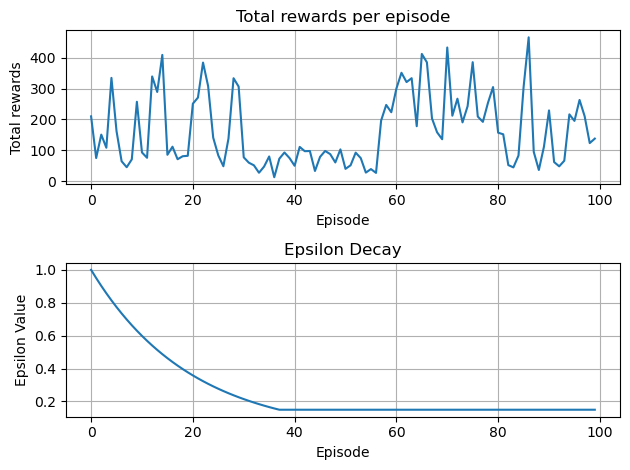

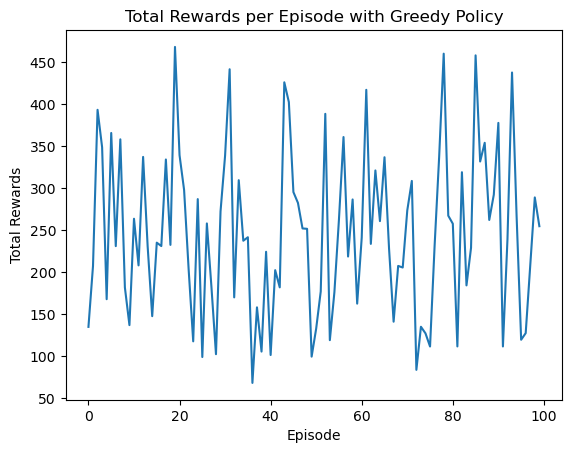

Trained Q Table 
{(0, 0): array([0.24710004, 0.36588513, 0.39940514, 0.30653382]),
 (0, 1): array([0.93950521, 1.4210442 , 0.77183782, 0.26885045]),
 (0, 2): array([0.22186713, 1.25496114, 1.23595976, 0.23130646]),
 (0, 3): array([0.55641679, 0.06751721, 0.4141209 , 0.66639199]),
 (1, 0): array([0.92592312, 0.50157933, 0.56719688, 1.48931949]),
 (1, 1): array([0.83924352, 0.76053162, 1.94000614, 0.59817355]),
 (1, 2): array([1.36085221, 0.80452408, 3.01309804, 0.95438179]),
 (1, 3): array([0.56473693, 0.89741881, 0.35476344, 0.69921446]),
 (2, 0): array([2.14774176, 0.92052203, 1.09847733, 3.08214683]),
 (2, 1): array([4.45715569, 0.33311332, 5.29808439, 1.84667061]),
 (2, 2): array([4.54387364, 0.61483577, 8.71549431, 1.17396862]),
 (2, 3): array([0.12780283, 0.78313387, 0.3550614 , 0.48381278]),
 (3, 0): array([0.71687059, 0.35712515, 0.33512644, 0.92526476]),
 (3, 1): array([0.68464426, 0.3791758 , 0.24290352, 0.14574067]),
 (3, 2): array([0.85110903, 0.36167625, 0.99396302, 0.70626

In [92]:
eps = SARSA(env=StochasticEnvironment(timesteps=100), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.95)
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSASto.q_table.pkl')

### Hyperparameters tuning in SARSA with Stochastic Environment

{}
Here Discount factor and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.42407919, 0.98018033, 0.92512906, 0.0820195 ]),
 (0, 1): array([0.37842839, 0.87963256, 0.15453516, 0.92596243]),
 (0, 2): array([0.97457894, 0.22395024, 0.55569506, 0.57882207]),
 (0, 3): array([0.53400363, 0.95122511, 0.23398105, 0.57936992]),
 (1, 0): array([0.60067766, 0.35696522, 0.55449391, 0.11458094]),
 (1, 1): array([0.68018493, 0.99217849, 0.85514272, 0.20274   ]),
 (1, 2): array([4.87031302e-01, 8.55728565e-01, 1.76530413e-04, 5.21769946e-01]),
 (1, 3): array([0.56916646, 0.12700955, 0.15828356, 0.19036297]),
 (2, 0): array([0.42666064, 0.18884606, 0.67616184, 0.83022315]),
 (2, 1): array([0.46817736, 0.15197133, 0.69863435, 0.83686781]),
 (2, 2): array([0.9613439 , 0.47270195, 0.04048953, 0.20719451]),
 (2, 3): array([0.31124538, 0.52690176, 0.4009817 , 0.47401572]),
 (3, 0): array([0.59766599, 0.41940087, 0.96716337, 0.26513464]),
 (3, 1): array([0.43788654, 0.2936326 , 0.18120685, 0.016469

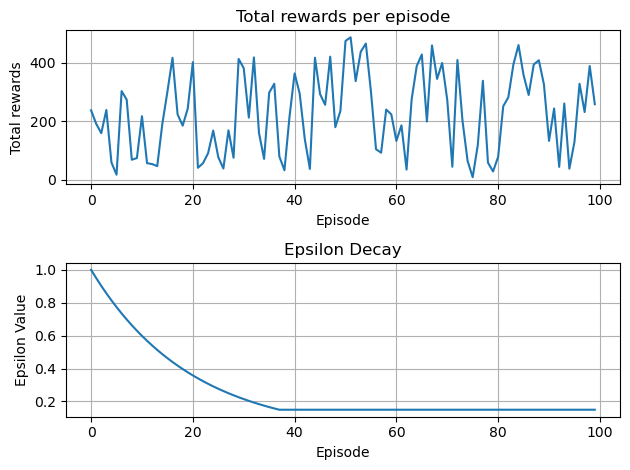

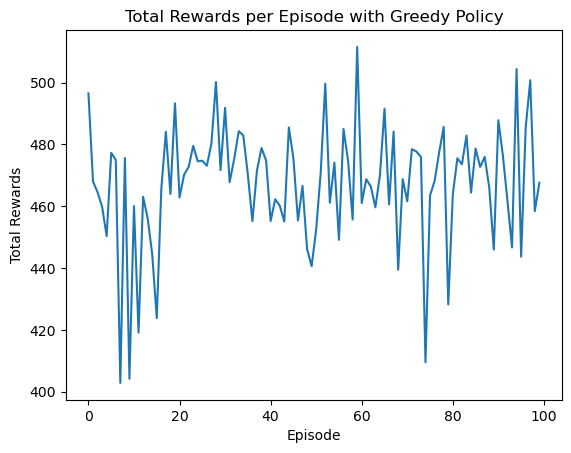

Trained Q Table 
{(0, 0): array([6.91483103, 4.59383204, 4.5844214 , 8.5468795 ]),
 (0, 1): array([19.67515546, 13.88687451, 20.42117756,  8.70859928]),
 (0, 2): array([26.70749595, 16.17513091, 25.67217622,  5.35308823]),
 (0, 3): array([0.53400363, 0.95122511, 0.23398105, 0.57936992]),
 (1, 0): array([15.75273916,  4.23493489, 12.12798354, 18.13083494]),
 (1, 1): array([30.8441848 , 13.26859632, 37.05908591, 21.7662186 ]),
 (1, 2): array([39.50836607, 13.1377985 , 35.05597324, 12.88222112]),
 (1, 3): array([0.56916646, 0.12700955, 0.15828356, 0.19036297]),
 (2, 0): array([16.13120728,  3.81572891, 22.21501001, 17.12590933]),
 (2, 1): array([29.66051911, 17.61065374, 41.2725399 , 21.07463793]),
 (2, 2): array([40.17983839, 18.05546248, 39.97863511, 20.97318167]),
 (2, 3): array([0.31124538, 0.52690176, 0.4009817 , 0.47401572]),
 (3, 0): array([0.59766599, 0.41940087, 0.96716337, 0.26513464]),
 (3, 1): array([0.43788654, 0.2936326 , 0.18120685, 0.01646909]),
 (3, 2): array([0.46381161,

In [93]:
eps = SARSA(env=StochasticEnvironment(timesteps=100), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.2, discount_factor = 0.9)
print('Here Discount factor and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSASto.q_table_1.pkl')

{}
Here Discount factor and episode is tuned
Initial Q Table
{(0, 0): array([0.78518838, 0.00501848, 0.31884052, 0.87360094]),
 (0, 1): array([0.66380761, 0.89369503, 0.03763898, 0.63922456]),
 (0, 2): array([0.02829877, 0.59711009, 0.09519161, 0.45266942]),
 (0, 3): array([0.17565973, 0.3877382 , 0.72905496, 0.28799764]),
 (1, 0): array([0.39489273, 0.92402351, 0.85942784, 0.53595919]),
 (1, 1): array([0.17561963, 0.52216373, 0.22408916, 0.9105748 ]),
 (1, 2): array([0.49122347, 0.01370915, 0.99116307, 0.14455071]),
 (1, 3): array([0.88144028, 0.86469305, 0.24915005, 0.80816656]),
 (2, 0): array([0.76501982, 0.03609913, 0.72430621, 0.17145005]),
 (2, 1): array([0.18669155, 0.00403922, 0.90150509, 0.84869578]),
 (2, 2): array([0.22975241, 0.26678328, 0.98654723, 0.96528522]),
 (2, 3): array([0.66687235, 0.81600043, 0.66008492, 0.63458087]),
 (3, 0): array([0.71110286, 0.68266693, 0.21501473, 0.81112878]),
 (3, 1): array([0.30360021, 0.22522135, 0.2665073 , 0.22660773]),
 (3, 2): array(

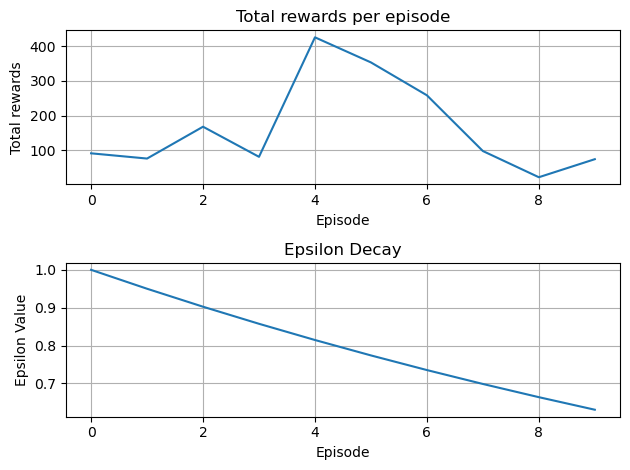

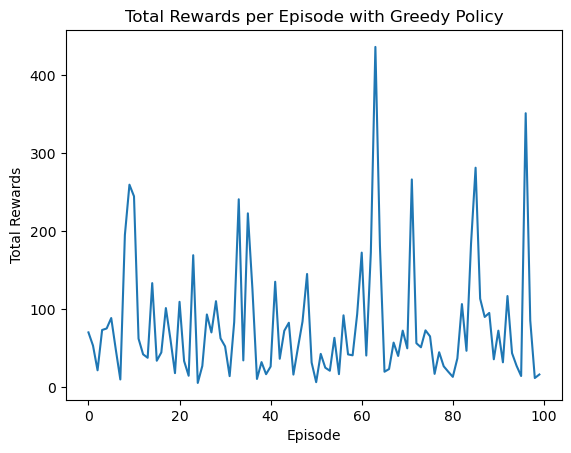

Trained Q Table 
{(0, 0): array([0.78518838, 0.49155448, 0.3358861 , 0.87314375]),
 (0, 1): array([0.67831254, 1.12833356, 0.10308237, 0.64843955]),
 (0, 2): array([0.02829877, 1.0090571 , 0.59105977, 0.45266942]),
 (0, 3): array([0.17565973, 0.3877382 , 0.72905496, 0.28799764]),
 (1, 0): array([0.40360575, 0.90723177, 0.85942784, 0.66220209]),
 (1, 1): array([0.50470015, 0.54134826, 0.34121082, 0.92443774]),
 (1, 2): array([0.862574  , 0.15029554, 1.47193893, 0.15861722]),
 (1, 3): array([0.88144028, 0.86469305, 0.24915005, 0.80816656]),
 (2, 0): array([0.95514247, 0.03609913, 0.7737316 , 0.96456588]),
 (2, 1): array([2.87667602, 0.00403922, 1.32122991, 0.9974486 ]),
 (2, 2): array([4.00949186, 0.26678328, 3.35142678, 1.0231946 ]),
 (2, 3): array([0.66687235, 0.81600043, 0.66008492, 0.63458087]),
 (3, 0): array([0.71110286, 0.68266693, 0.21501473, 0.81112878]),
 (3, 1): array([0.30360021, 0.22522135, 0.2665073 , 0.22660773]),
 (3, 2): array([0.4075025 , 0.70445095, 0.1553778 , 0.63400

In [94]:
eps = SARSA(env=StochasticEnvironment(timesteps=100), epsilon=1, episodes = 10, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here Discount factor and episode is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSASto.q_table_2.pkl')

{}
Here Discount factor and epsilon is tuned
Initial Q Table
{(0, 0): array([0.72148795, 0.38561856, 0.42830094, 0.87017568]),
 (0, 1): array([0.31185158, 0.88500302, 0.17999534, 0.00103941]),
 (0, 2): array([0.16427582, 0.24035385, 0.18698569, 0.2081705 ]),
 (0, 3): array([0.60783725, 0.93837273, 0.39185032, 0.31945737]),
 (1, 0): array([0.73818679, 0.37227331, 0.40729819, 0.1983021 ]),
 (1, 1): array([0.52405543, 0.85493428, 0.52938274, 0.7234395 ]),
 (1, 2): array([0.97829017, 0.87069997, 0.54371091, 0.33936831]),
 (1, 3): array([0.31057756, 0.80107218, 0.32021022, 0.78847467]),
 (2, 0): array([0.20657513, 0.02460779, 0.57992402, 0.25724274]),
 (2, 1): array([0.82538577, 0.83383104, 0.01376262, 0.37593412]),
 (2, 2): array([0.13092053, 0.63412382, 0.88045417, 0.04456079]),
 (2, 3): array([0.25517583, 0.39569596, 0.18362369, 0.71959144]),
 (3, 0): array([0.40182369, 0.88501823, 0.30302123, 0.0320596 ]),
 (3, 1): array([0.85356597, 0.03345062, 0.31747266, 0.47760752]),
 (3, 2): array(

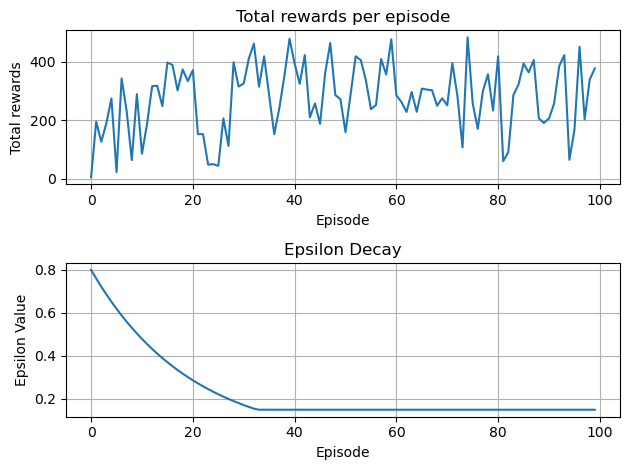

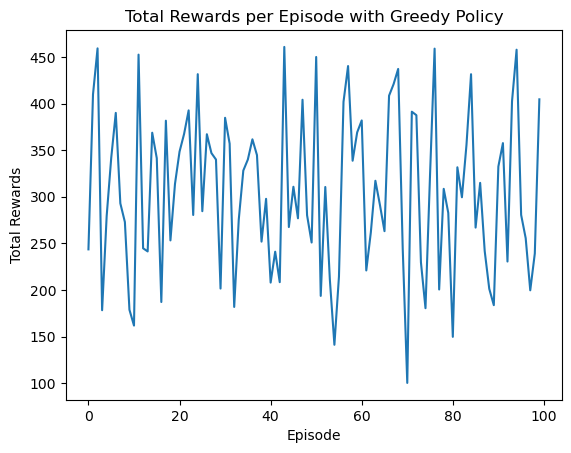

Trained Q Table 
{(0, 0): array([0.86602304, 0.67877897, 0.42830094, 0.79150668]),
 (0, 1): array([0.591542  , 1.01894861, 0.30565733, 0.05739787]),
 (0, 2): array([0.53859247, 1.45264305, 1.53196041, 0.21996941]),
 (0, 3): array([0.60783725, 0.93837273, 0.39185032, 0.31945737]),
 (1, 0): array([4.41911522, 0.39712694, 0.40729819, 1.98012307]),
 (1, 1): array([9.39649416, 0.85289724, 1.5403305 , 0.78290236]),
 (1, 2): array([14.43064861,  1.13669032,  8.12522967,  0.36949754]),
 (1, 3): array([0.31057756, 0.80107218, 0.32021022, 0.78847467]),
 (2, 0): array([6.75475856, 0.06070845, 0.57992402, 4.32486235]),
 (2, 1): array([15.08763851,  0.83383104,  2.96284002,  1.19437522]),
 (2, 2): array([21.40432167,  0.83363424, 17.36993319,  0.2833366 ]),
 (2, 3): array([0.25517583, 0.39569596, 0.18362369, 0.71959144]),
 (3, 0): array([0.40182369, 0.88501823, 0.30302123, 0.0320596 ]),
 (3, 1): array([0.85356597, 0.03345062, 0.31747266, 0.47760752]),
 (3, 2): array([0.16772467, 0.51613528, 0.28860

In [95]:
eps = SARSA(env=StochasticEnvironment(timesteps=100), epsilon=0.8, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.8)
print('Here Discount factor and epsilon is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSASto.q_table_3.pkl')

{}
Here episode and epsilon is tuned
Initial Q Table
{(0, 0): array([0.99972753, 0.9790828 , 0.1666855 , 0.46088592]),
 (0, 1): array([0.19091688, 0.08550836, 0.26873431, 0.42624312]),
 (0, 2): array([0.07701949, 0.40574809, 0.5164224 , 0.95855144]),
 (0, 3): array([0.70196023, 0.87261662, 0.26916544, 0.16261384]),
 (1, 0): array([0.90513997, 0.97564455, 0.56884682, 0.7175336 ]),
 (1, 1): array([0.52565823, 0.76041833, 0.73659   , 0.10067841]),
 (1, 2): array([0.49882032, 0.45798074, 0.4413322 , 0.08021704]),
 (1, 3): array([0.58777025, 0.48001754, 0.89871709, 0.26814743]),
 (2, 0): array([0.54797667, 0.66775033, 0.85715457, 0.84861307]),
 (2, 1): array([0.82380838, 0.60300511, 0.98084085, 0.80180632]),
 (2, 2): array([0.55700254, 0.28716998, 0.54213557, 0.31393045]),
 (2, 3): array([0.25417042, 0.65033134, 0.45847378, 0.55426374]),
 (3, 0): array([0.66846251, 0.99547205, 0.64971821, 0.93684249]),
 (3, 1): array([0.15527597, 0.3630124 , 0.29502226, 0.78194472]),
 (3, 2): array([0.24834

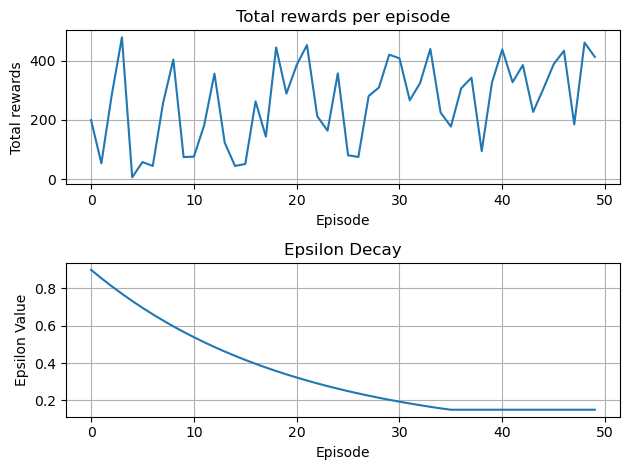

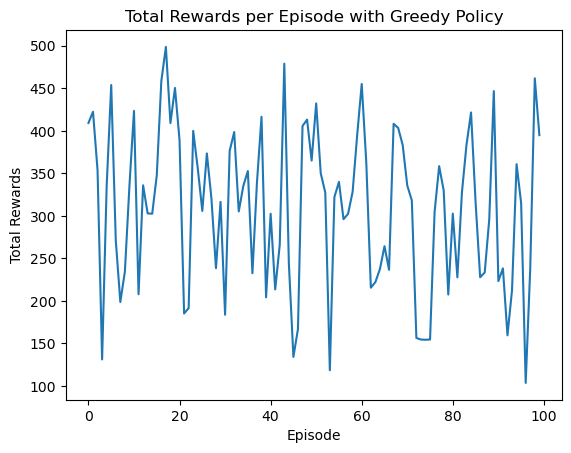

Trained Q Table 
{(0, 0): array([1.02782707, 0.92564816, 0.16860334, 0.79647449]),
 (0, 1): array([0.28096625, 0.76695248, 0.33390173, 0.45854483]),
 (0, 2): array([0.30466508, 1.07904437, 0.94102039, 0.95412794]),
 (0, 3): array([0.70196023, 0.87261662, 0.26916544, 0.16261384]),
 (1, 0): array([3.21459957, 1.04187806, 0.63772278, 1.04655273]),
 (1, 1): array([6.54142532, 0.82465671, 0.89364659, 0.15379174]),
 (1, 2): array([8.55144843, 0.74869574, 2.93393284, 0.08632379]),
 (1, 3): array([0.58777025, 0.48001754, 0.89871709, 0.26814743]),
 (2, 0): array([8.47246411, 0.70549171, 0.93025692, 1.79085185]),
 (2, 1): array([19.0923771 ,  0.62426759,  2.15032678,  0.96782159]),
 (2, 2): array([27.22242058,  0.34439645, 19.09784147,  0.51704706]),
 (2, 3): array([0.25417042, 0.65033134, 0.45847378, 0.55426374]),
 (3, 0): array([0.66846251, 0.99547205, 0.64971821, 0.93684249]),
 (3, 1): array([0.15527597, 0.3630124 , 0.29502226, 0.78194472]),
 (3, 2): array([0.24834935, 0.81446058, 0.78295336,

In [96]:
eps = SARSA(env=StochasticEnvironment(timesteps=100), epsilon=0.9, episodes = 50, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here episode and epsilon is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSASto.q_table_4.pkl')

{}
Here timesteps and learnig rate is tuned
Initial Q Table
{(0, 0): array([0.71514487, 0.26717921, 0.31808414, 0.56506071]),
 (0, 1): array([0.88536519, 0.09773233, 0.38785495, 0.60362873]),
 (0, 2): array([0.19503371, 0.71507859, 0.75620076, 0.74131706]),
 (0, 3): array([0.44078898, 0.40032013, 0.59920301, 0.34036593]),
 (1, 0): array([0.01644181, 0.74814786, 0.92023113, 0.01312102]),
 (1, 1): array([0.46801619, 0.7139863 , 0.39776888, 0.48278091]),
 (1, 2): array([0.23022716, 0.91057256, 0.63463767, 0.70999012]),
 (1, 3): array([0.55017176, 0.91635464, 0.49832864, 0.36260106]),
 (2, 0): array([0.79969126, 0.13092789, 0.28352047, 0.10965798]),
 (2, 1): array([0.60290471, 0.35896127, 0.01983946, 0.67924461]),
 (2, 2): array([0.29571979, 0.80772636, 0.83462405, 0.29437205]),
 (2, 3): array([1.33054767e-01, 2.55714175e-01, 2.96391905e-04, 8.03367250e-01]),
 (3, 0): array([0.6514638 , 0.5890345 , 0.40451574, 0.14793868]),
 (3, 1): array([0.57198715, 0.32646956, 0.5088205 , 0.43252632]),


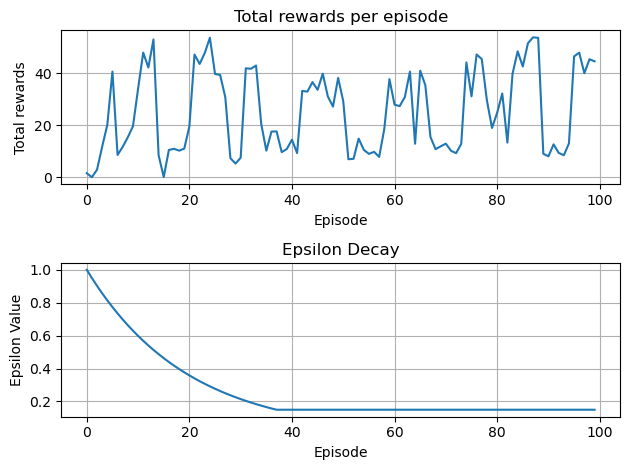

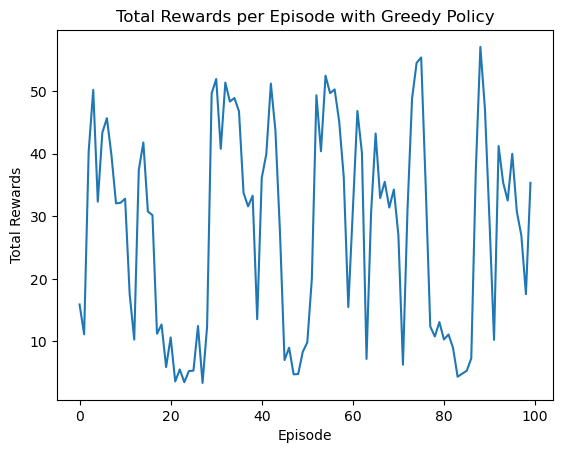

Trained Q Table 
{(0, 0): array([1.47607939, 0.7133428 , 0.60020314, 0.6346925 ]),
 (0, 1): array([0.81799689, 1.75533554, 0.58176058, 0.61562923]),
 (0, 2): array([5.86030982, 1.23655977, 6.44413645, 0.77943076]),
 (0, 3): array([0.44078898, 0.40032013, 0.59920301, 0.34036593]),
 (1, 0): array([ 6.3440106 ,  1.80371619,  1.16739113, 10.74909937]),
 (1, 1): array([25.1585339 ,  0.96967022,  5.15514782,  2.02266265]),
 (1, 2): array([35.37849973,  1.12000331, 20.12194354,  2.10744587]),
 (1, 3): array([0.55017176, 0.91635464, 0.49832864, 0.36260106]),
 (2, 0): array([11.80906427,  1.52145462,  0.97656586, 10.07778985]),
 (2, 1): array([36.77720892,  6.28770026, 12.88764865, 11.0393684 ]),
 (2, 2): array([40.04049406,  1.16143504, 26.03917131, 18.0237655 ]),
 (2, 3): array([1.33054767e-01, 2.55714175e-01, 2.96391905e-04, 8.03367250e-01]),
 (3, 0): array([0.6514638 , 0.5890345 , 0.40451574, 0.14793868]),
 (3, 1): array([0.57198715, 0.32646956, 0.5088205 , 0.43252632]),
 (3, 2): array([0.4

In [97]:
eps = SARSA(env=StochasticEnvironment(timesteps=10), epsilon=1, episodes = 100, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.3, discount_factor = 0.9)
print('Here timesteps and learnig rate is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSASto.q_table_5.pkl')

{}
Here timesteps and episodes is tuned
Initial Q Table
{(0, 0): array([0.82701325, 0.42793731, 0.26828489, 0.14997712]),
 (0, 1): array([0.54322009, 0.55127248, 0.61295284, 0.13729407]),
 (0, 2): array([0.99537809, 0.09517013, 0.36651001, 0.00667922]),
 (0, 3): array([0.55015689, 0.63417949, 0.59842963, 0.78478532]),
 (1, 0): array([0.45060927, 0.67851793, 0.38390494, 0.6889691 ]),
 (1, 1): array([0.73787661, 0.71504891, 0.68241722, 0.90838072]),
 (1, 2): array([0.22634151, 0.86326667, 0.46567243, 0.16382113]),
 (1, 3): array([0.57209105, 0.43149165, 0.92734265, 0.92556458]),
 (2, 0): array([0.05466576, 0.95860145, 0.26344654, 0.93696638]),
 (2, 1): array([0.83794671, 0.69292318, 0.81112265, 0.61186521]),
 (2, 2): array([0.69504672, 0.02515794, 0.97226926, 0.61237504]),
 (2, 3): array([0.54301   , 0.64243372, 0.0511881 , 0.89813597]),
 (3, 0): array([0.12928501, 0.21687806, 0.65557604, 0.37012978]),
 (3, 1): array([0.40374606, 0.17975549, 0.81523685, 0.60439918]),
 (3, 2): array([0.45

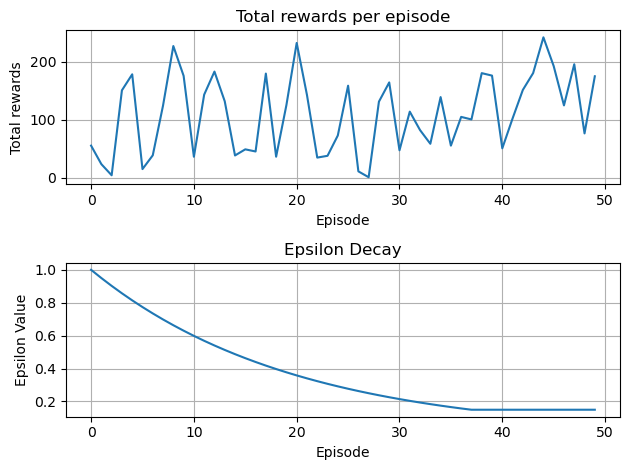

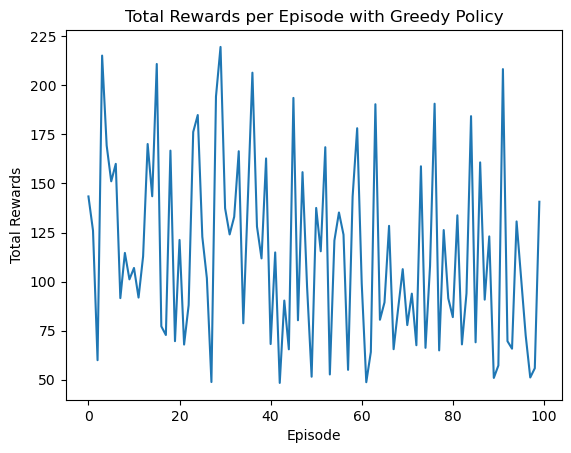

Trained Q Table 
{(0, 0): array([0.83396801, 0.54957046, 0.31641649, 0.62101885]),
 (0, 1): array([0.54322009, 0.92638673, 0.98557055, 0.16314393]),
 (0, 2): array([0.99537809, 0.72796678, 1.81684351, 0.01998264]),
 (0, 3): array([0.55015689, 0.63417949, 0.59842963, 0.78478532]),
 (1, 0): array([0.57357495, 0.68543357, 0.38390494, 0.86948115]),
 (1, 1): array([0.99399359, 0.74386536, 1.05778202, 0.99950269]),
 (1, 2): array([0.65233613, 0.89903926, 2.37052577, 0.21462548]),
 (1, 3): array([0.57209105, 0.43149165, 0.92734265, 0.92556458]),
 (2, 0): array([1.52791692, 0.99357497, 0.33441179, 1.32439741]),
 (2, 1): array([4.58538309, 0.69292318, 3.00112928, 0.6368356 ]),
 (2, 2): array([6.08633424, 0.02515794, 9.92515357, 0.6800266 ]),
 (2, 3): array([0.54301   , 0.64243372, 0.0511881 , 0.89813597]),
 (3, 0): array([0.12928501, 0.21687806, 0.65557604, 0.37012978]),
 (3, 1): array([0.40374606, 0.17975549, 0.81523685, 0.60439918]),
 (3, 2): array([0.45873055, 0.70186395, 0.16025993, 0.66780

In [98]:
eps = SARSA(env=StochasticEnvironment(timesteps=50), epsilon=1, episodes = 50, n_actions=4, max_timesteps=100, 
                             learning_rate = 0.01, discount_factor = 0.9)
print('Here timesteps and episodes is tuned')
print("Initial Q Table")
pprint(eps.q_table)
eps.epsilon_decay()
eps.run_greedy_policy()
print('Trained Q Table ')
pprint(eps.q_table)
eps.save('SARSASto.q_table_6.pkl')